<a href="https://colab.research.google.com/github/irfan7210/AirBnb-data-analysis/blob/main/Cardivascular_Risk_Prediction__main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** - Dileep Singh
##### **Team Member 2 -** - Vishal Singh
##### **Team Member 3 -** - Mohammad Irfan
##### **Team Member 4 -** - Md. Inamul

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize':(8,6),'figure.dpi':100})


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

filepath ='/content/drive/MyDrive/data_cardiovascular_risk.csv'
df = pd.read_csv(filepath)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 3390
The number of columns in data is 17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# df.duplicated().sum()
duplicate_rows_in_store_data = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows_in_store_data)

The number of duplicates in store data is: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<AxesSubplot:>

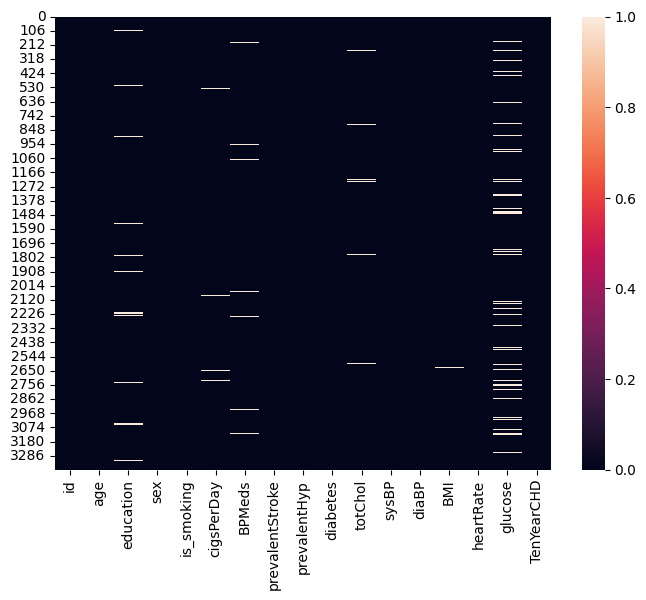

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=True)

### What did you know about your dataset?

This dataset contains many features which has null values. As we see, there are lots of null values in 'glucose' column. The features 'education', 'cigsPerDay', 'BPMeds', and 'totChol' also has missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(list(df.columns))

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
# Dataset Describe
df.describe()


,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

**Demographic**
* Sex: male or female("M" or "F")

* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for col in df.columns:
  print(f'The unique values in {col} are {df[col].unique()}' )

The unique values in id are [   0    1    2 ... 3387 3388 3389]
The unique values in age are [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
The unique values in education are [ 2.  4.  1.  3. nan]
The unique values in sex are ['F' 'M']
The unique values in is_smoking are ['YES' 'NO']
The unique values in cigsPerDay are [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
The unique values in BPMeds are [ 0. nan  1.]
The unique values in prevalentStroke are [0 1]
The unique values in prevalentHyp are [0 1]
The unique values in diabetes are [0 1]
The unique values in totChol are [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 19

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking number of persons having heart attack
print("No. of persons having heart attack :",len(df[df['TenYearCHD']==1]))
print("No. of persons not having heart attack :",len(df[df['TenYearCHD']==0]))
# Assigning persons having haert attack
df_chd=df[(df['TenYearCHD']==1)]
# Assigning persons not having herat attack
df_notchd=df[(df['TenYearCHD']==0)]

No. of persons having heart attack : 511
No. of persons not having heart attack : 2879


In [ ]:
#Here we are checking how education play an important role of controlling heart attack
pd.DataFrame(df.groupby(['education'])['TenYearCHD'].value_counts())

TenYearCHD
education TenYearCHD            
1.0       0                 1135
          1                  256
2.0       0                  872
          1                  118
3.0       0                  479
          1                   70
4.0       0                  319
          1                   54

Here we can see that less educated people are more prone to heart 
attack.

In [ ]:
#Lets check which age people are at high risk of heart disease
# Lets check how much middle age are risk to heart disease
middle_age=df[(df['age']>=31) & (df['age'] <=45)]
counts_mage=middle_age['TenYearCHD'].value_counts()
midage=middle_age['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ma_con=pd.concat([counts_mage,midage], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The middle age people(age between 30 and 45) is \n {pd.DataFrame(ma_con)}')
# Lets check how much old age people are risk to heart disease
old_age=df[df['age'] >45]
counts_old=old_age['TenYearCHD'].value_counts()
olda=old_age['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
old_con=pd.concat([counts_old,olda], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The old age people(age greater than 45) is \n {pd.DataFrame(old_con)}')


The middle age people(age between 30 and 45) is 
    count       % risk of heart attack
0   1197                        93.1%
1     89                         6.9%
The old age people(age greater than 45) is 
    count       % risk of heart attack
0   1682                        79.9%
1    422                        20.1%


Here we can see that old age people are at higher risk of heart disease as compare to middle age people.

Here 1 and 0 represents:

 **1** - Having Heart disease
 
 **0** - Not having heart disease

In [ ]:
# Here we are checking which sex is vmore prone to heart attack.
pd.DataFrame(df.groupby(['sex'])['TenYearCHD'].value_counts())

TenYearCHD
sex TenYearCHD            
F   0                 1684
    1                  239
M   0                 1195
    1                  272

Here we can see that female are less prone to heart attack as compare to male.

In [ ]:
# Checking smoking
pd.DataFrame(df.groupby(['sex','is_smoking'])['TenYearCHD'].value_counts())

TenYearCHD
sex is_smoking TenYearCHD            
F   NO         0                 1000
               1                  147
    YES        0                  684
               1                   92
M   NO         0                  467
               1                   89
    YES        0                  728
               1                  183

Here we can see that Males are smoking more as compare to females therefore they are more prone to heart attack

In [ ]:
#Checking the people who are taking BP meditation how much they are prone to heart attack
pd.DataFrame(df.groupby(['BPMeds'])['TenYearCHD'].value_counts())

TenYearCHD
BPMeds TenYearCHD            
0.0    0                 2775
       1                  471
1.0    0                   67
       1                   33

Here we can see that there are only 100 peoples taking BP meditation out of which only 33 people are prone to heart attack.

In [ ]:
#Checking the people who had prviously a stroke how much they are prone to heart attack
pd.DataFrame(df.groupby(['prevalentStroke'])['TenYearCHD'].value_counts())

TenYearCHD
prevalentStroke TenYearCHD            
0               0                 2867
                1                  501
1               0                   12
                1                   10

Here by seeing the above plot we can see that the people which had previously a stroke is less that is 22 and out of which 10 people around 
45% are at high risk of coronary heart disease CHD.

In [ ]:
#Lets check the risk of diabetic people how much they are prone to heart attack 
counts=df.groupby(['diabetes'])['TenYearCHD'].value_counts()
per=df.groupby(['diabetes'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,per], axis=1, keys=['count', 'percentage'])

count percentage
diabetes TenYearCHD                  
0        0            2825      85.5%
         1             478      14.5%
1        0              54      62.1%
         1              33      37.9%

Here we can see that there are only 87 people who are diabetic and out of which 37.9 % people are at high risk of coronary heart disesase CHD. 

In [ ]:
#Lets check the patient which was hypertensive how much they are prone to heart attack
counts=df.groupby(['prevalentHyp'])['TenYearCHD'].value_counts()
per=df.groupby(['prevalentHyp'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,per], axis=1, keys=['count', 'percentage'])

count percentage
prevalentHyp TenYearCHD                  
0            0            2065      89.0%
             1             256      11.0%
1            0             814      76.1%
             1             255      23.9%

Here we can see that the people who are suffering from hypertensive is 1069 out of which 23.9 % people are more prone to heart attack.

In [ ]:
# Lets check how many persons have high cholestrol levels
high_chol=df[df['totChol'] >=240]
h=high_chol['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(f'The people having cholestrol > 240 is \n {pd.DataFrame(h)}')
low_chol=df[df['totChol'] <=240]
l=low_chol['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(f'The people having cholestrol < 240 is \n {pd.DataFrame(l)}')

The people having cholestrol > 240 is 
   TenYearCHD
0      81.9%
1      18.1%
The people having cholestrol < 240 is 
   TenYearCHD
0      87.4%
1      12.6%


Here we can see that people who have high cholestrol that is greater than 240 have high risk to heart disease around 6 % more as compare to that people who have cholestrol level less than 240. 

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Lets check how much uderweight people are risk to heart disease 
# Here we are analyzing the Underwight,Overweight and Normal weight people by using BMI

low_wt=df[df['BMI'] <=18.5]
counts_lw=low_wt['TenYearCHD'].value_counts()
lw=low_wt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
lw_con=pd.concat([counts_lw,lw], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The under weight people is \n {pd.DataFrame(lw_con)}')
# Lets check how much moderate weight are risk to heart disease
mod_wt=df[(df['BMI']>18.5) & (df['BMI'] <=24.9)]
counts_mw=mod_wt['TenYearCHD'].value_counts()
mwt=mod_wt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
mw_con=pd.concat([counts_mw,mwt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The normal weight people is \n {pd.DataFrame(mw_con)}')
# Lets check how much overweight people are risk to heart disease
over_wt=df[df['BMI'] >24.9]
counts_ow=over_wt['TenYearCHD'].value_counts()
owt=over_wt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ow_con=pd.concat([counts_ow,owt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The over weight people is \n {pd.DataFrame(ow_con)}')

The under weight people is 
    count       % risk of heart attack
0     33                        80.5%
1      8                        19.5%
The normal weight people is 
    count       % risk of heart attack
0   1301                        87.7%
1    183                        12.3%
The over weight people is 
    count       % risk of heart attack
0   1538                        83.1%
1    313                        16.9%


Here we are analyzing the Underwight,Overweight and Normal weight people by using BMI:

Bmi
Weight Classification :

1.   Below 18.5
Underweight
2.  Normal 25.0 - 29.9
Overweight 
3.  Above 25 Overweight

Here we can see that Normal weight people are at less risk of heart attack as compare to Under weight and Overweight people.

In [ ]:
# Lets check how heart rate related to heart attack
#As we know the normal range of resting heart beat is between 60-100,if heart beat lies outside 
#this range then the people are at high risk of heart disease
low_hbt=df[df['heartRate'] <60]
counts_lhbt=low_hbt['TenYearCHD'].value_counts()
lhbt=low_hbt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
lhbt_con=pd.concat([counts_lhbt,lhbt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The low heart rate people is \n {pd.DataFrame(lhbt_con)}')
# Lets check how much normal heart beat people are at risk to heart disease
nom_hbt=df[(df['heartRate']>=60) & (df['heartRate'] <=100)]
counts_nhbt=nom_hbt['TenYearCHD'].value_counts()
nhbt=nom_hbt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
nhbt_con=pd.concat([counts_nhbt,nhbt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The normal heart rate people is \n {pd.DataFrame(nhbt_con)}')
# Lets check how much higher heart rate people are risk to heart disease
higher_hbt=df[df['heartRate'] >100]
counts_hhbt=higher_hbt['TenYearCHD'].value_counts()
hhbt=higher_hbt['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
hhbt_con=pd.concat([counts_hhbt,hhbt], axis=1, keys=['count', '      % risk of heart attack'])
print(f'The higher heart rate people is \n {pd.DataFrame(hhbt_con)}')


The low heart rate people is 
    count       % risk of heart attack
0    134                        87.0%
1     20                        13.0%
The normal heart rate people is 
    count       % risk of heart attack
0   2677                        84.9%
1    475                        15.1%
The higher heart rate people is 
    count       % risk of heart attack
0     68                        81.9%
1     15                        18.1%


Here we can see that the people who have higher heart rate are at high risk of heart disease.

### What all manipulations have you done and insights you found?

From the above table, it is clear that our data is ready to analyse. And ofcourse, there are null values in the data and categorical column in the data. So, we can treat null values, and convert the categorical features into numerical columns, and we wiil do this in feature engineering. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Countplot of Each Categorical (or Discrete) Columns (Univariate)

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

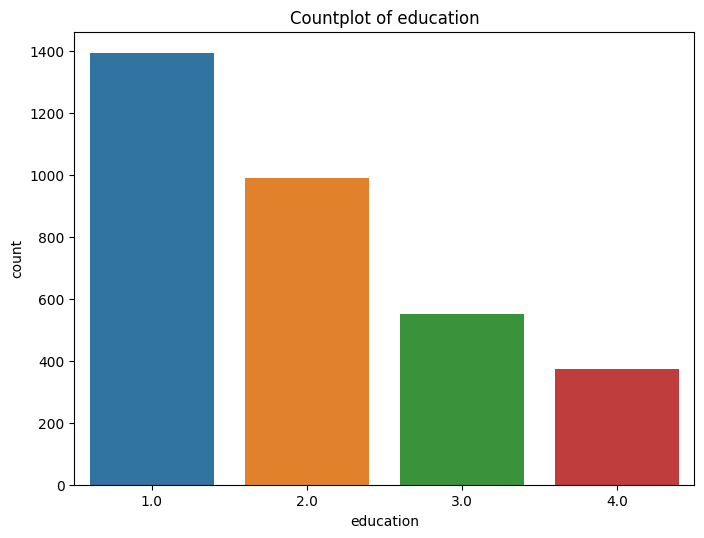

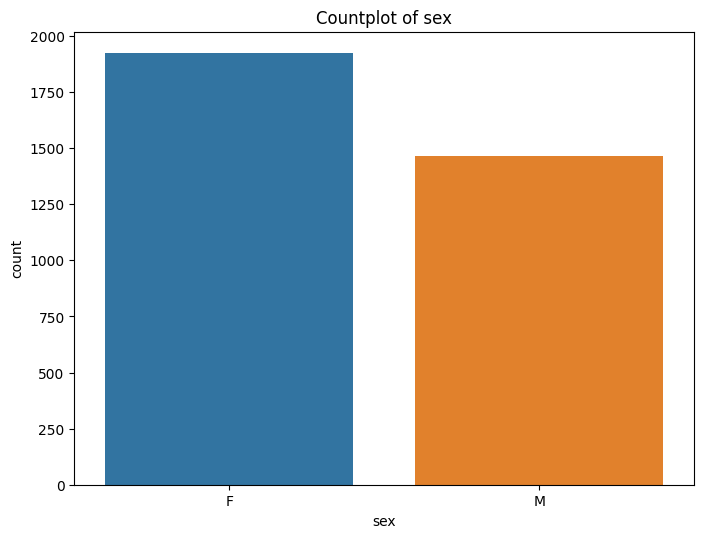

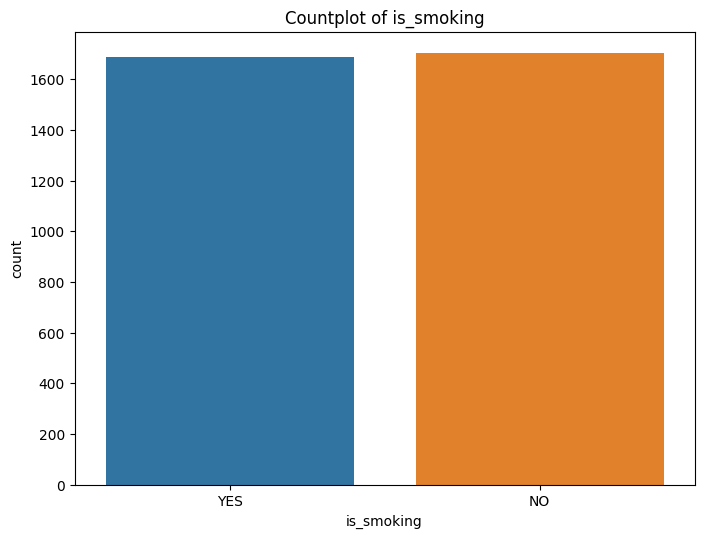

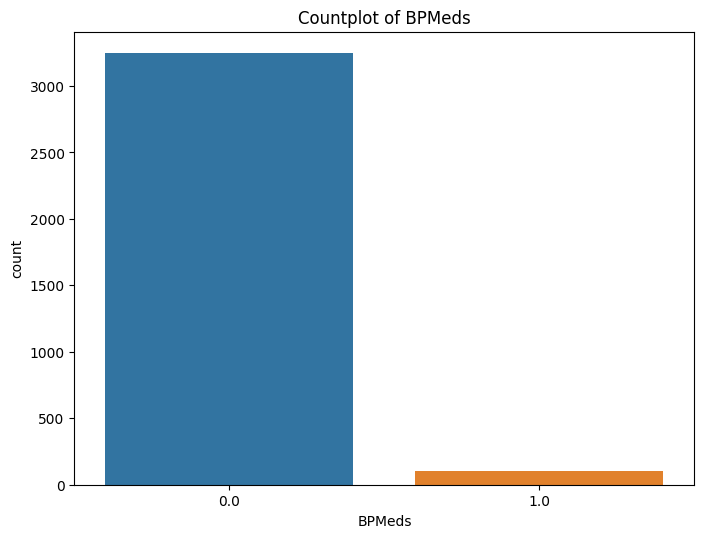

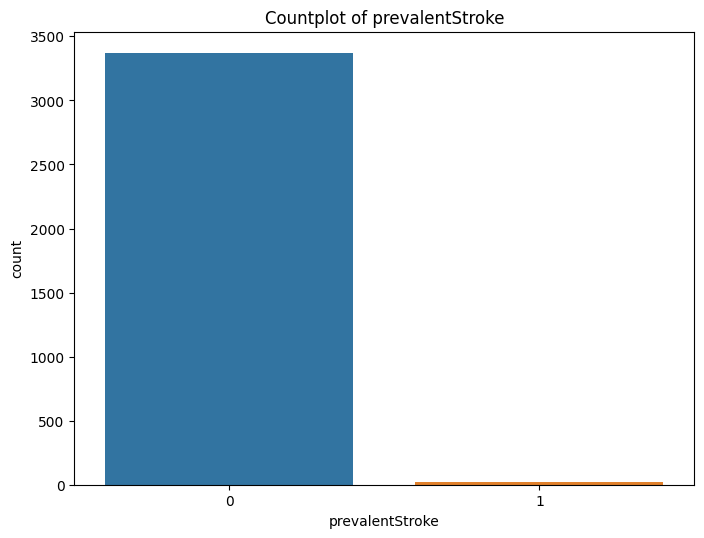

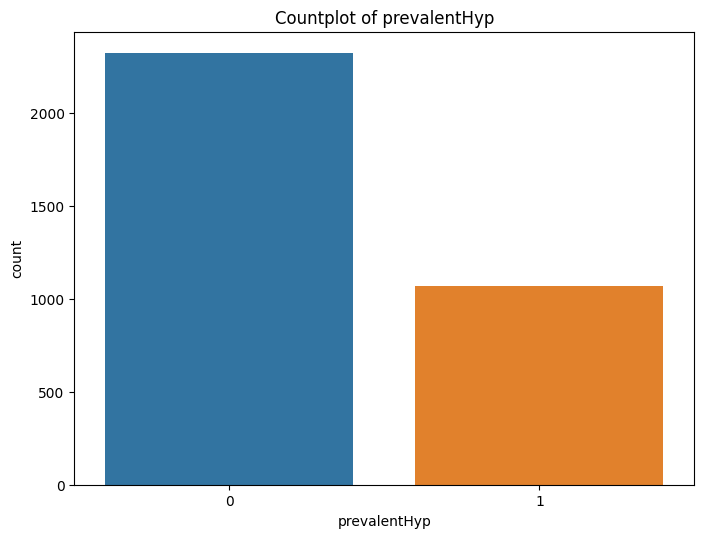

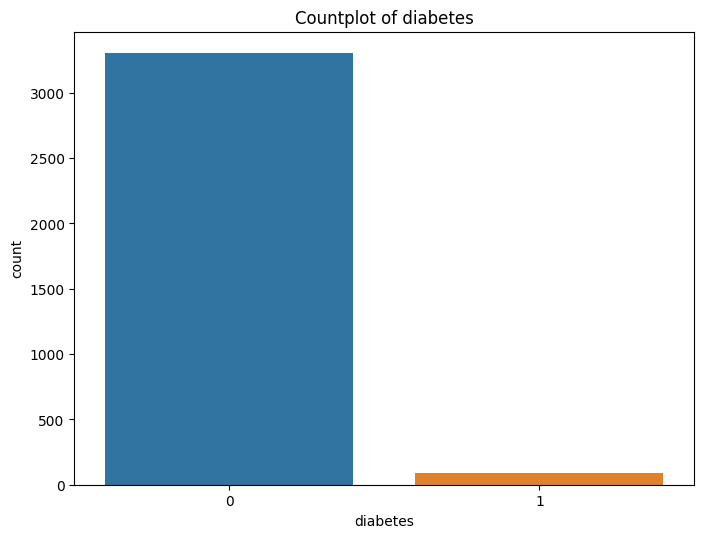

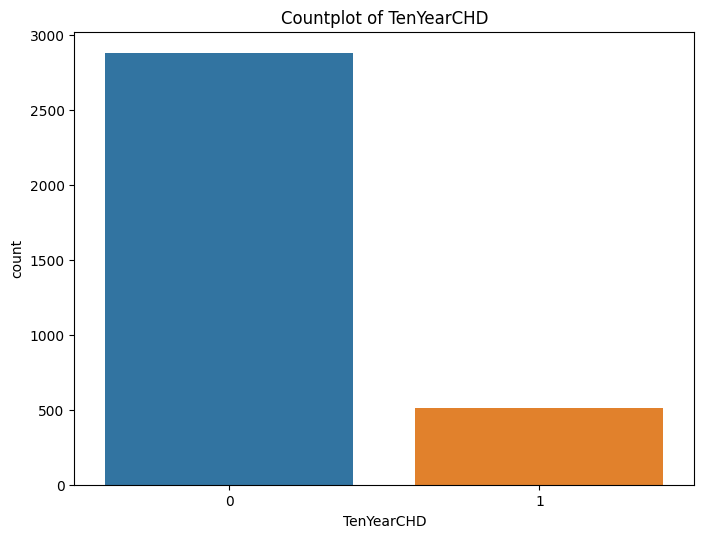

In [ ]:
# Chart - 1 visualization code
for col in df.columns:
  if col in ['is_smoking', 'education', 'sex', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']:
    plt.subplots(1,1)
    ax=sns.countplot(x=df[col])
    ax.set_title(f'Countplot of {col}')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 Hist Plot for Each Continuous Variables

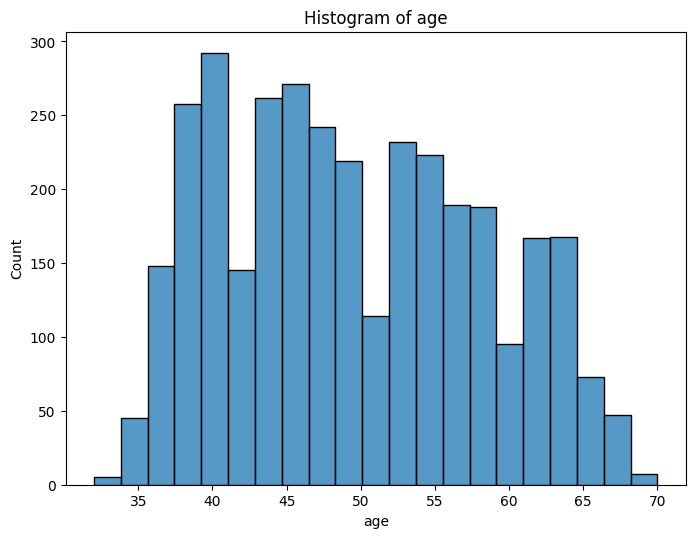

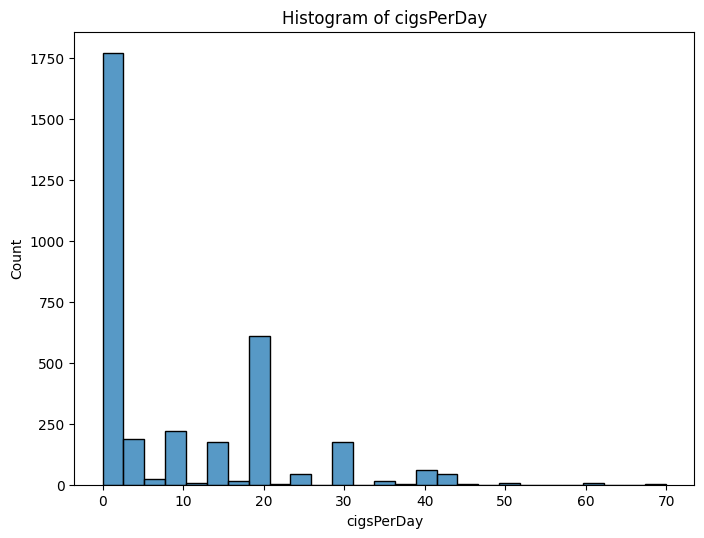

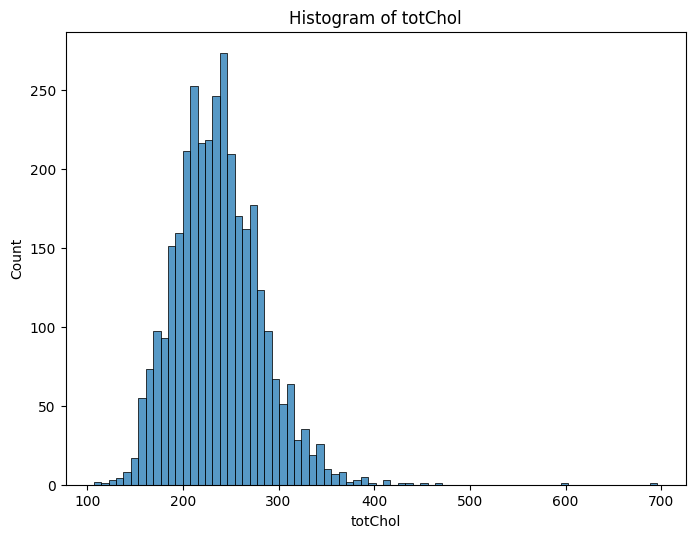

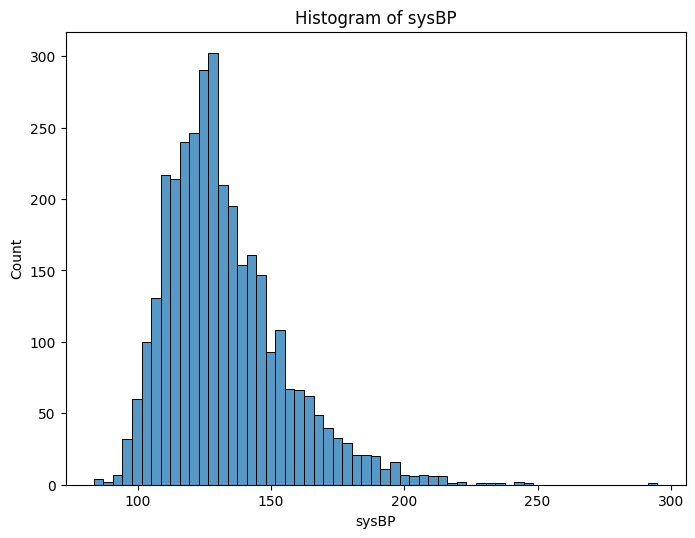

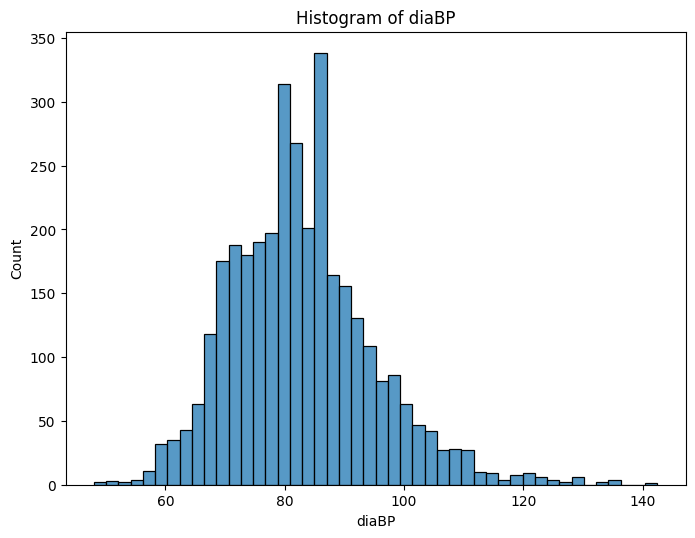

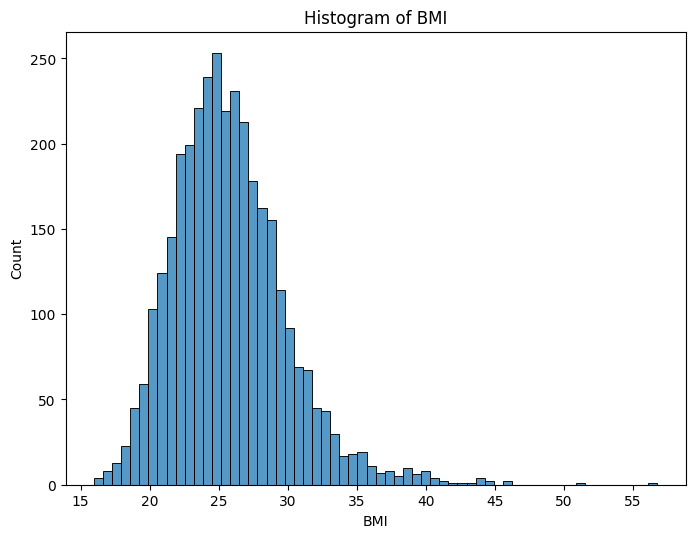

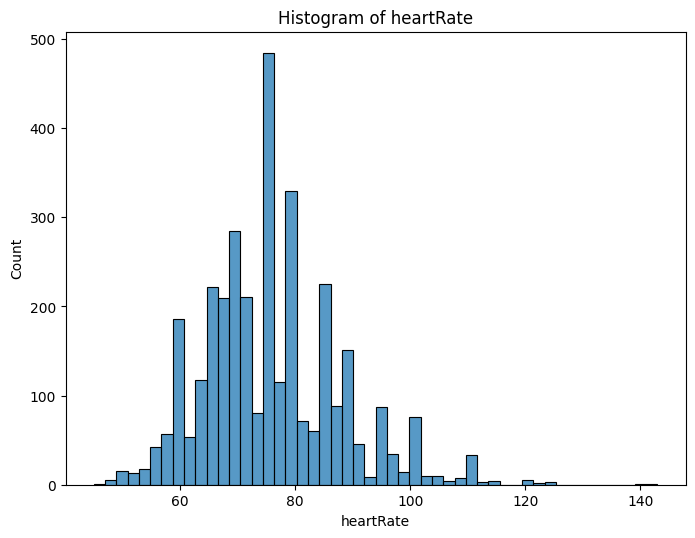

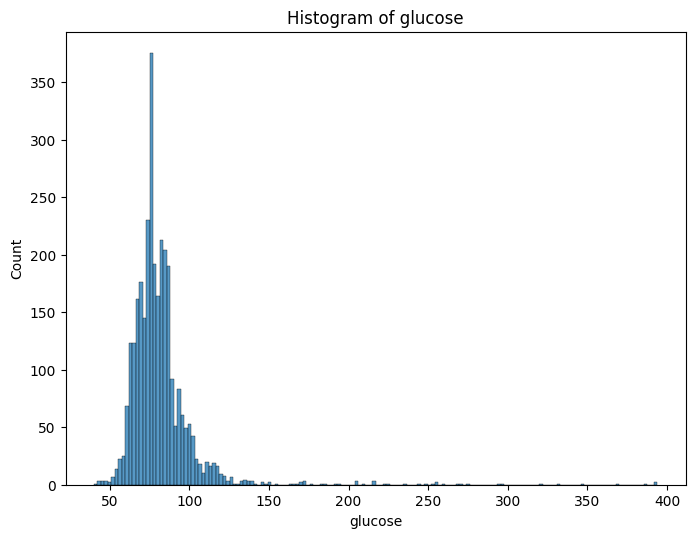

In [ ]:
# Chart - 2 visualization code
for col in df.describe().columns.to_list():
  if col not in ['id', 'is_smoking', 'education', 'sex', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']:
    plt.subplots(1,1)
    ax=sns.histplot(x=df[col])
    ax.set_title(f'Histogram of {col}')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
df.head(2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


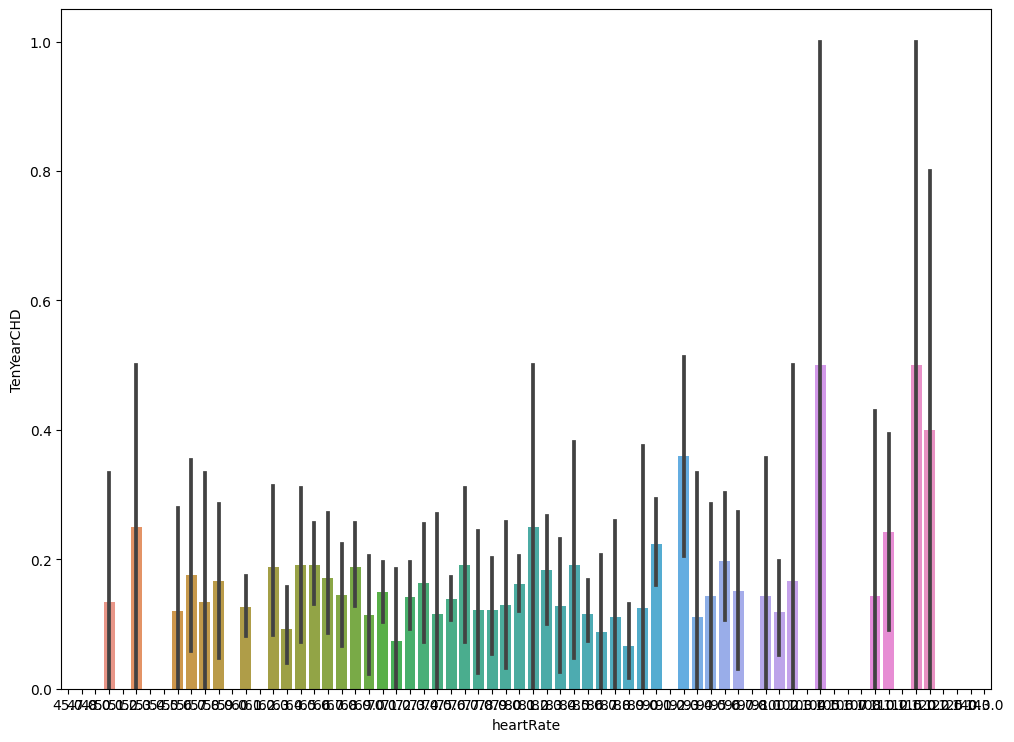

In [ ]:
# Chart - 3 visualization code
plt.rcParams.update({'figure.figsize':(12,9),'figure.dpi':100})
sns.barplot(x=df['heartRate'],y=df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1


In [ ]:
df.education.unique()

array([ 2.,  4.,  1.,  3., nan])

Text(0.5, 1.0, 'Percentage of Education Levels')

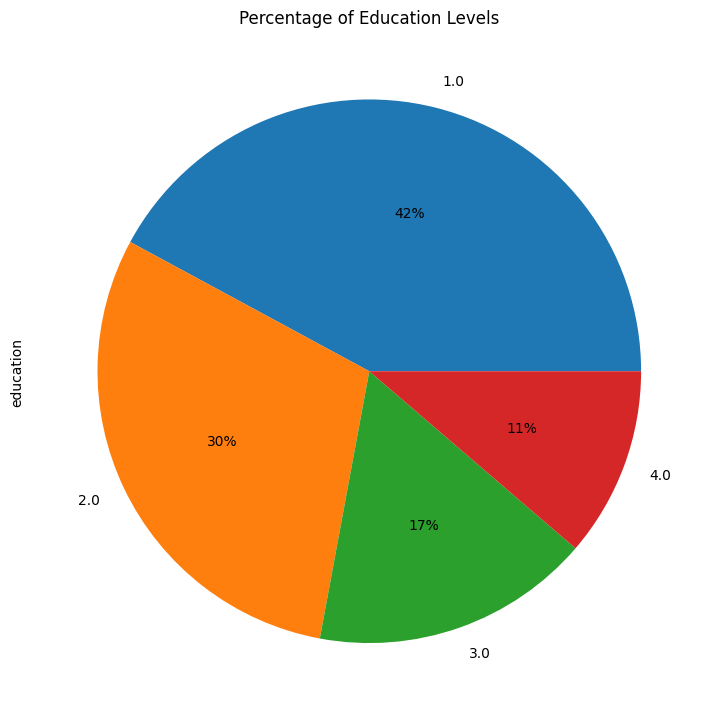

In [ ]:
# Chart - 4 visualization code

# Define the value counts in Education
education=df['education'].value_counts()

# Define the plot in percentage
education.plot(kind='pie', autopct='%1.0f%%')
plt.title('Percentage of Education Levels')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

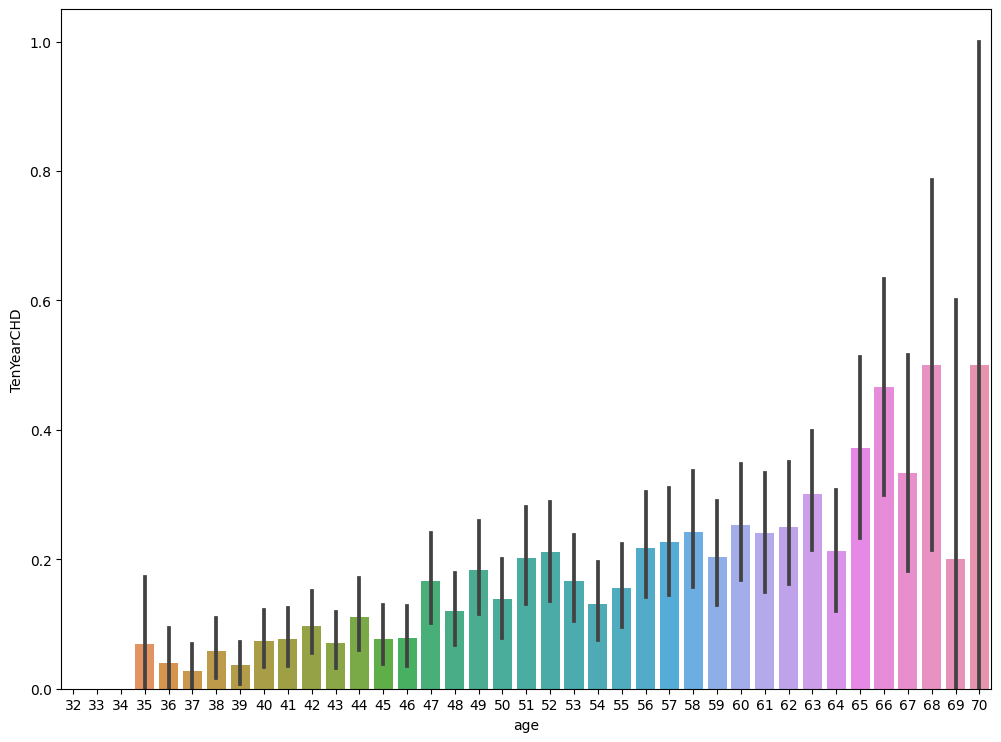

In [ ]:
# Chart - 5 visualization code
sns.barplot(x=df['age'],y=df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1


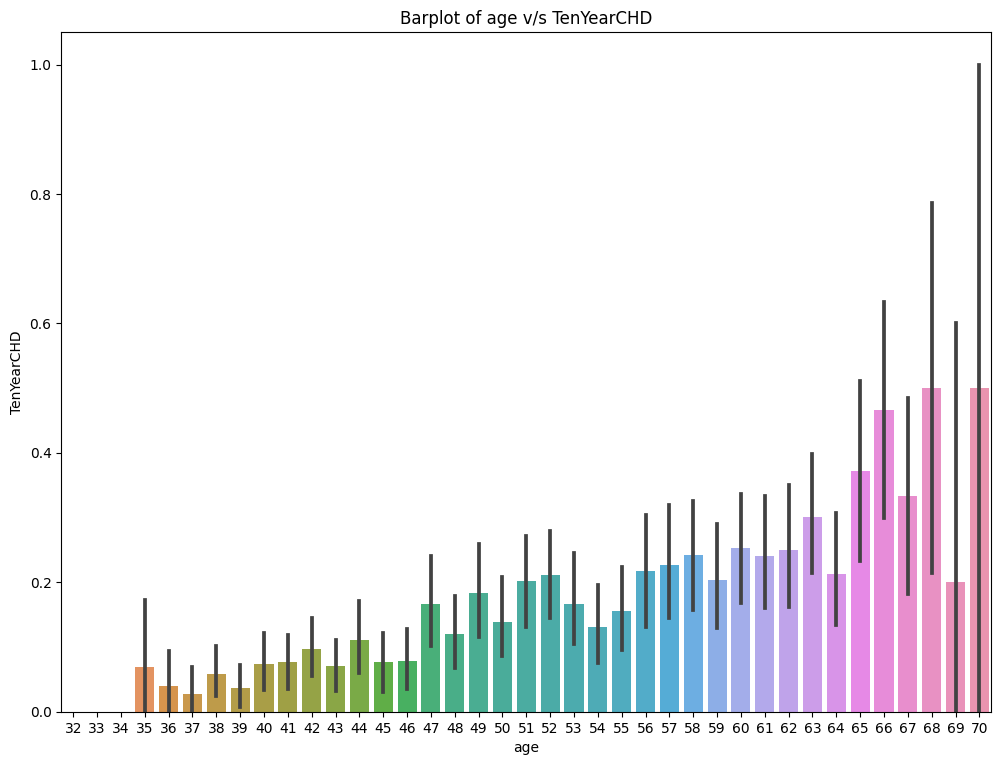

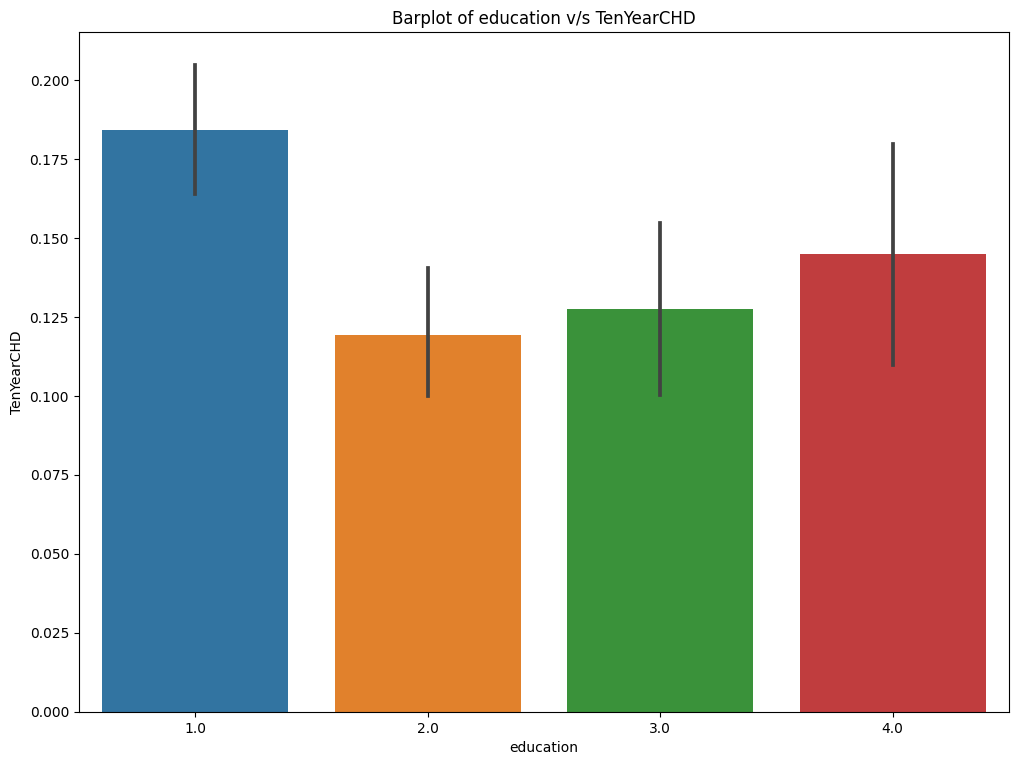

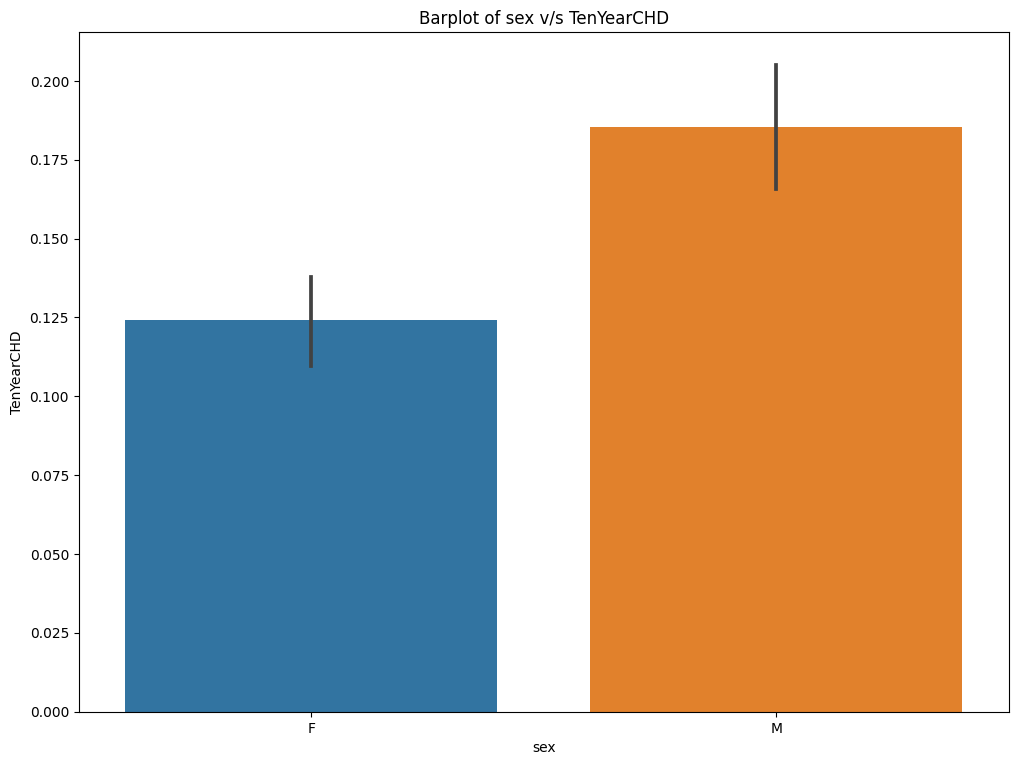

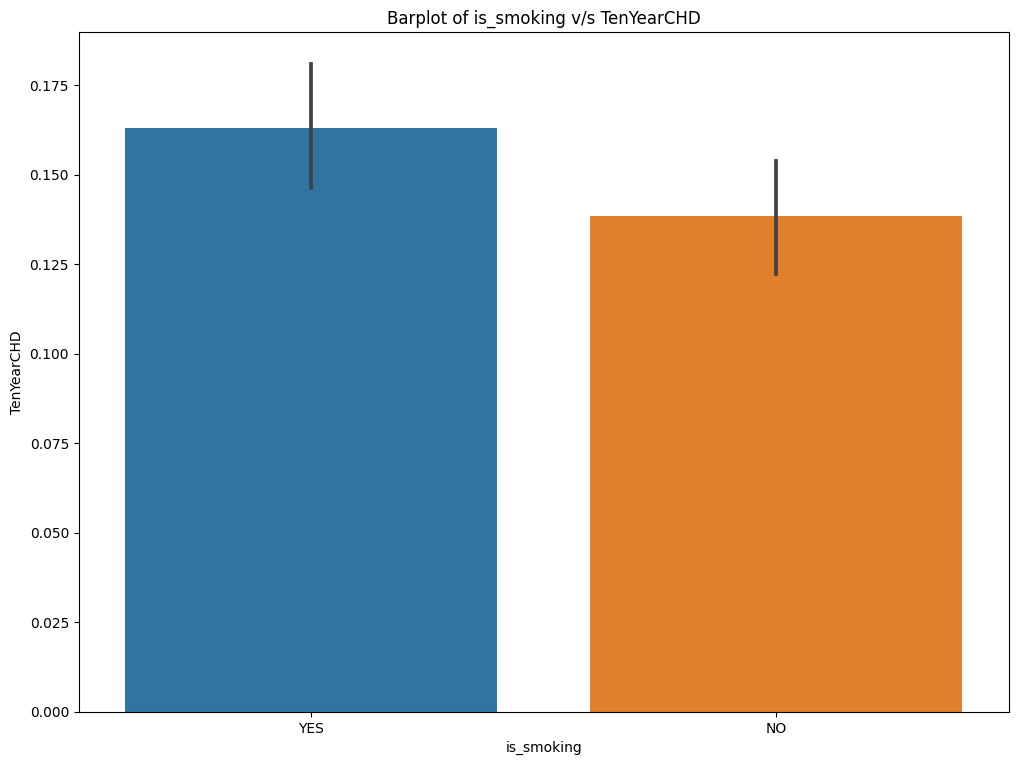

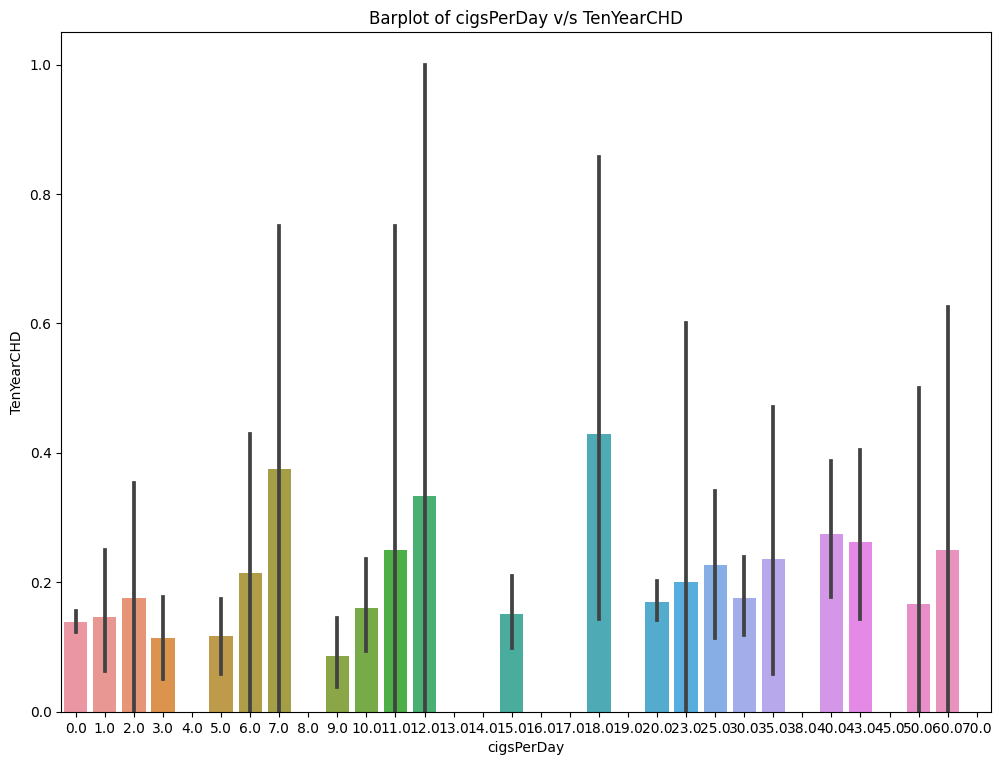

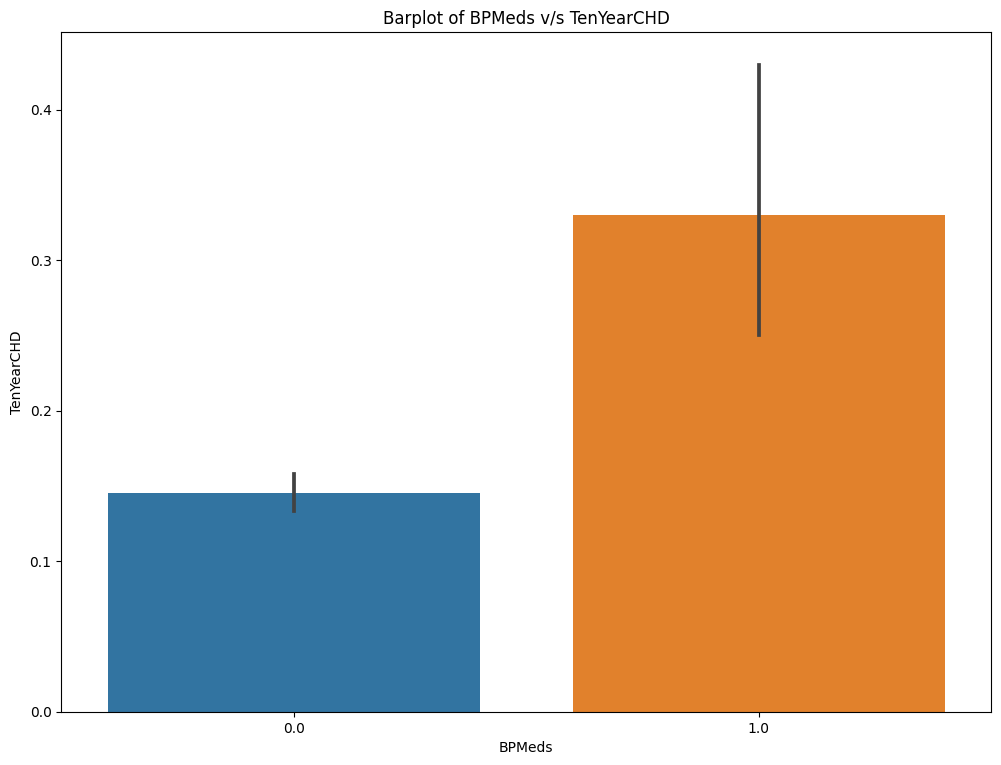

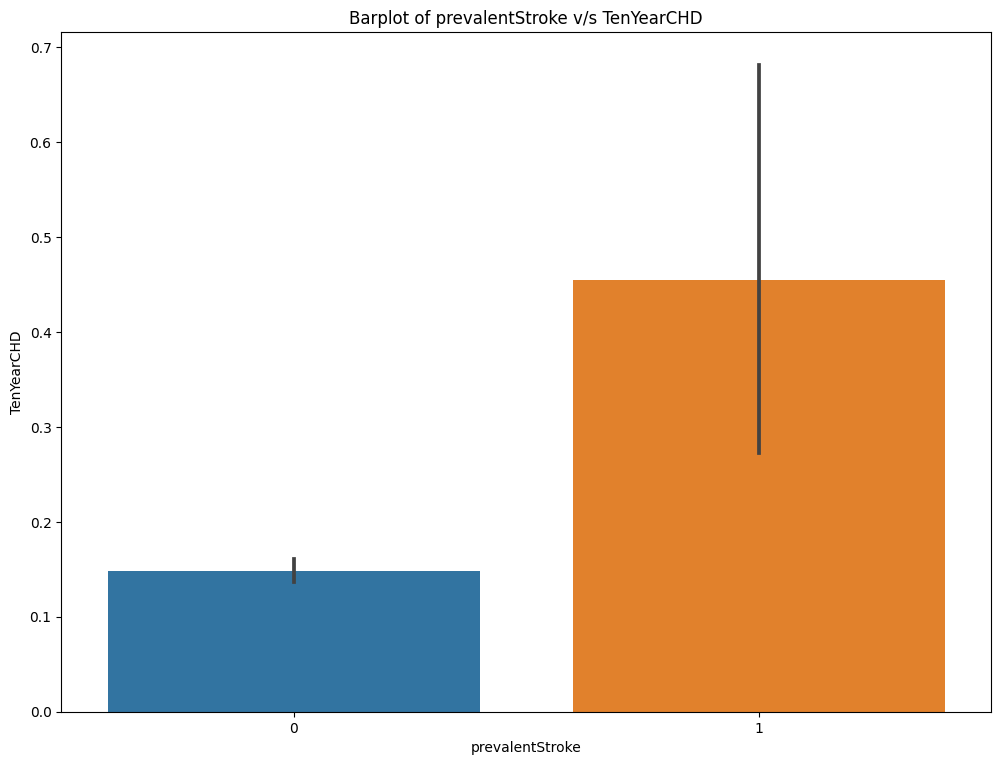

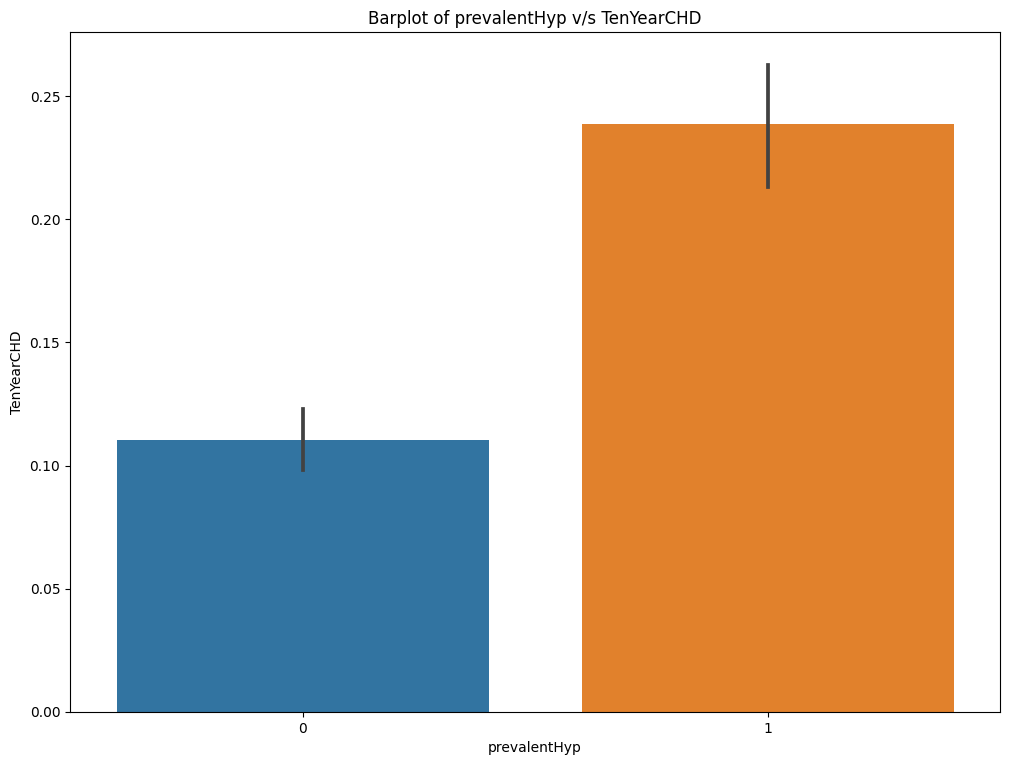

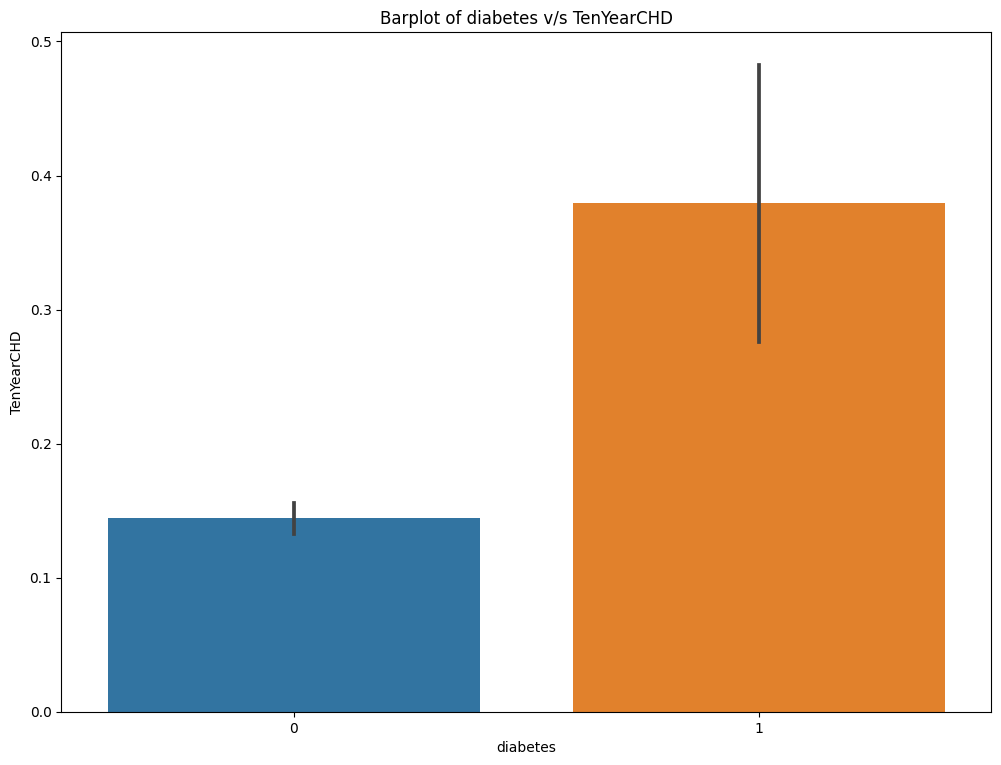

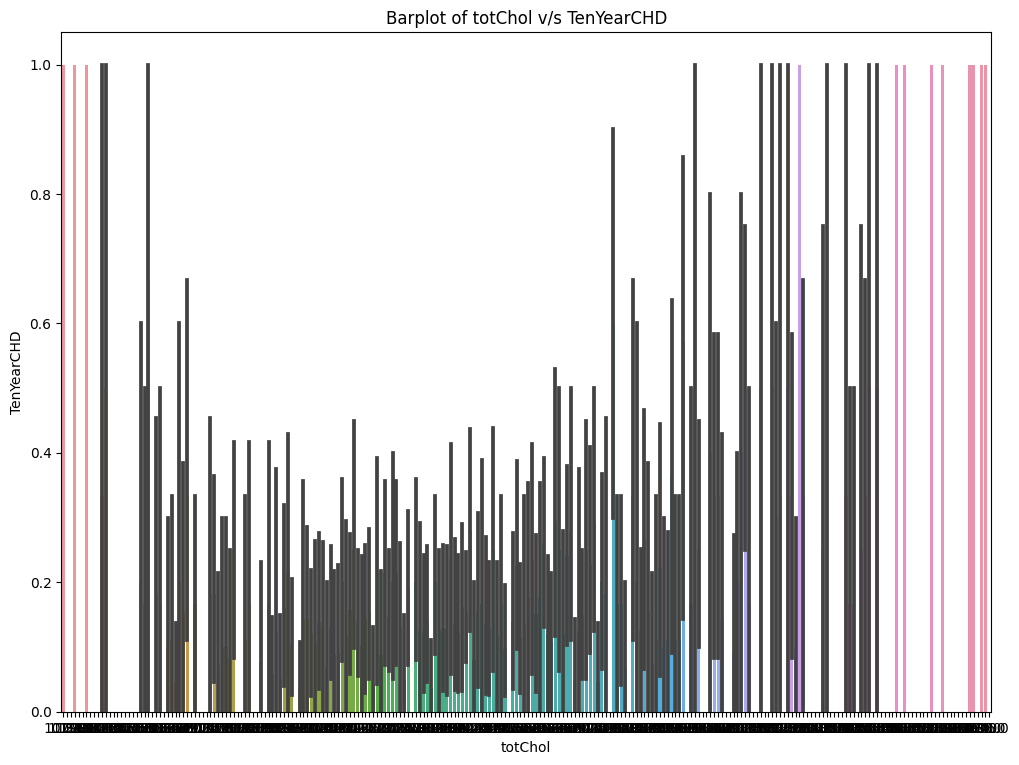

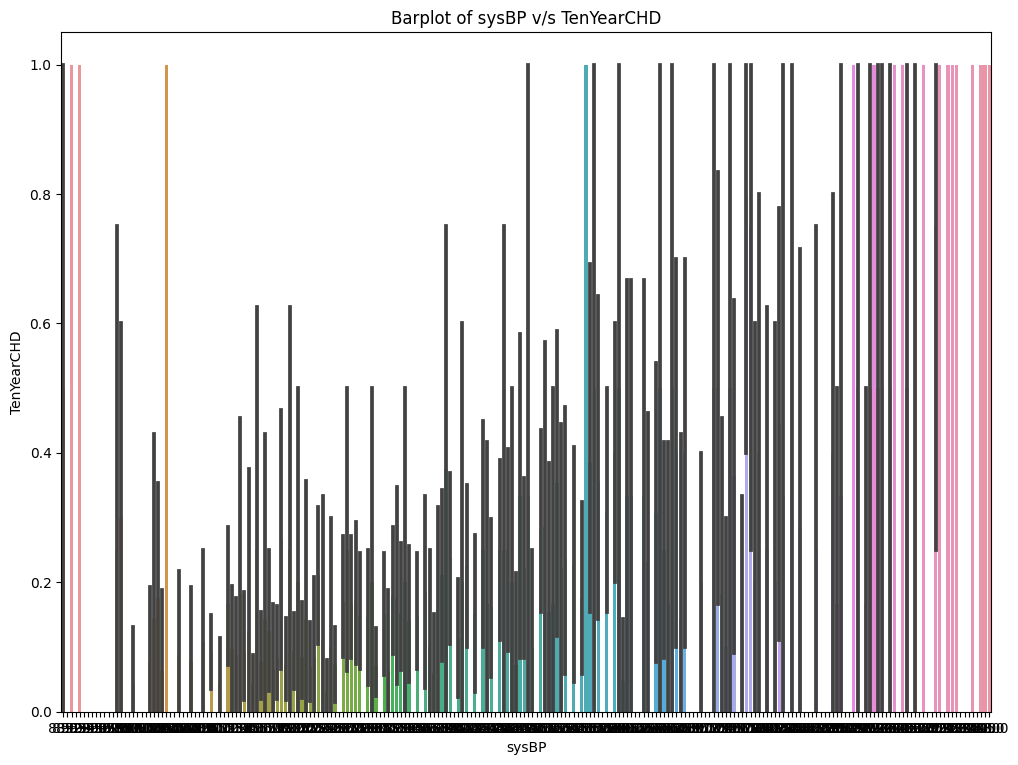

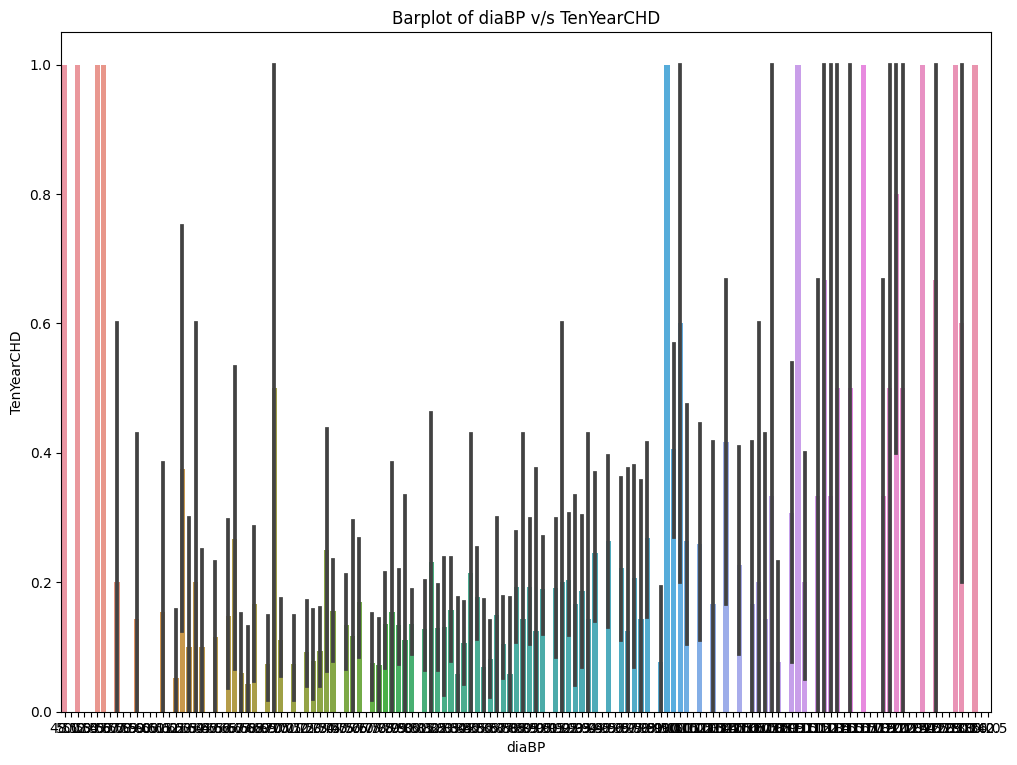

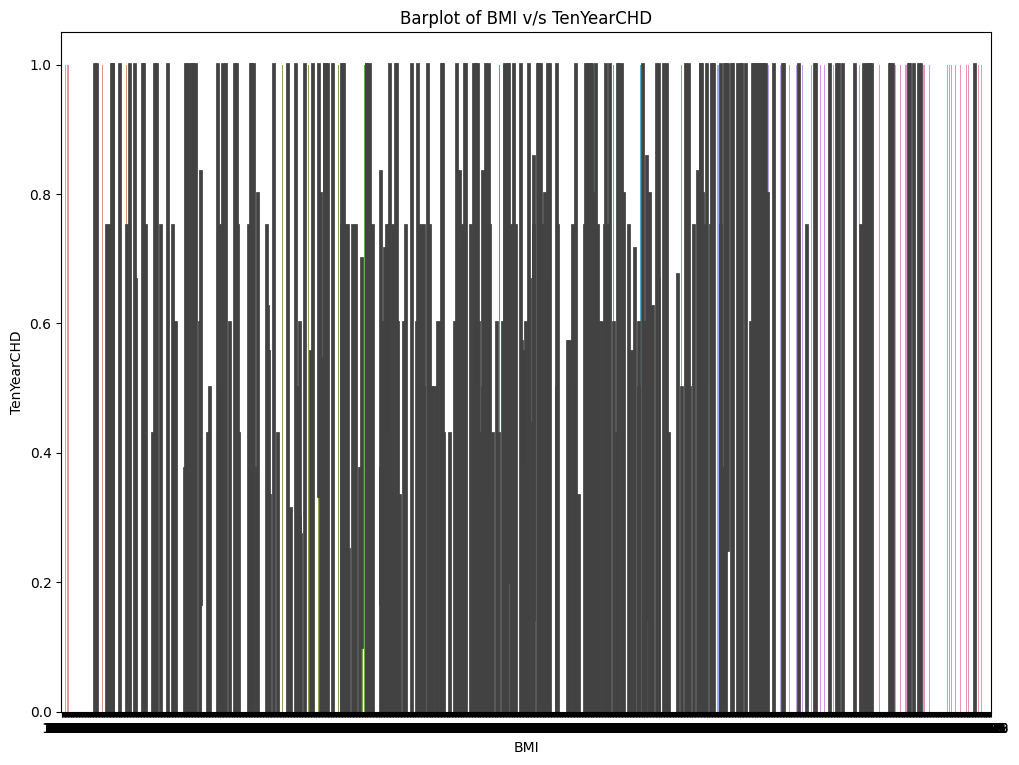

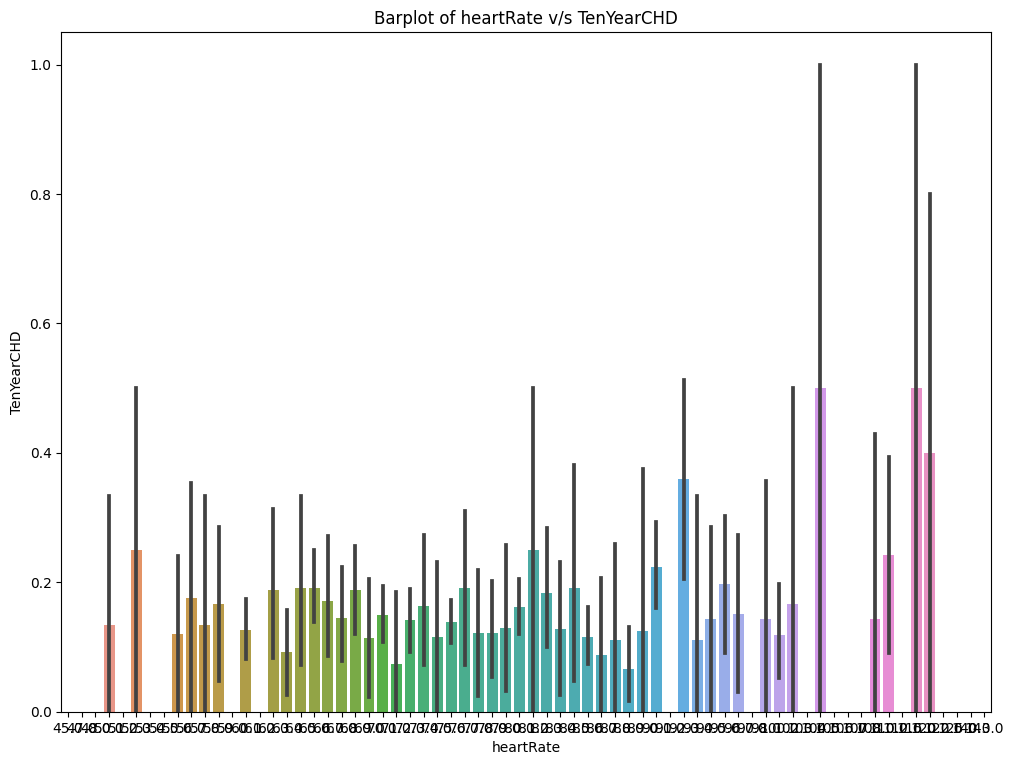

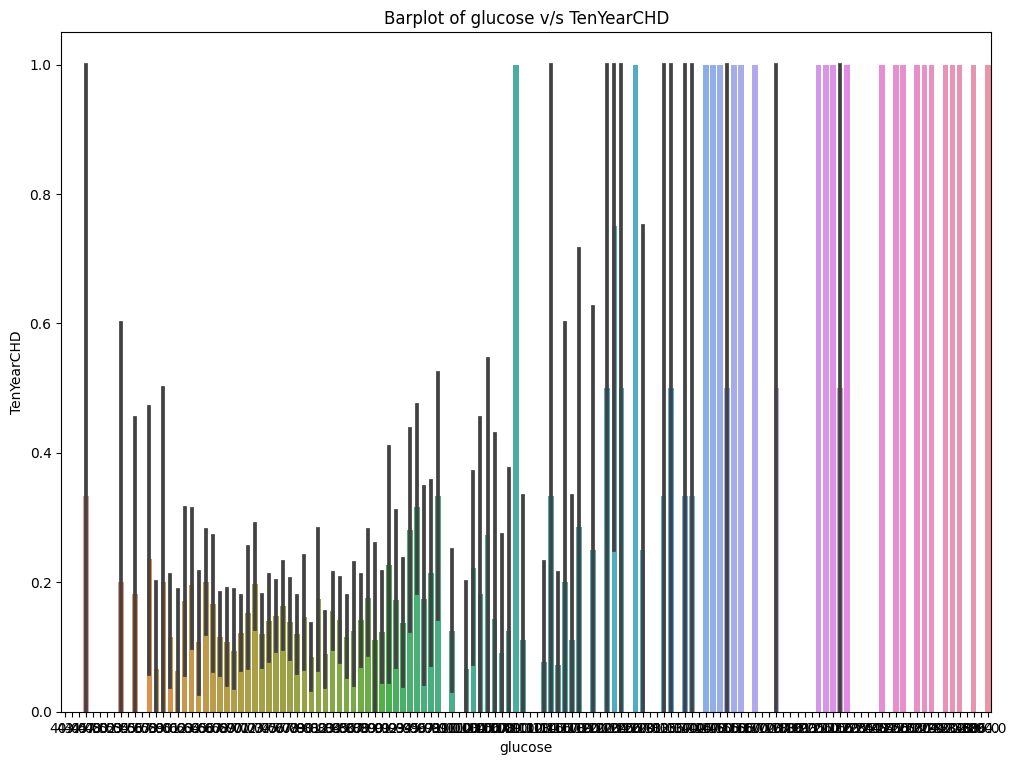

In [ ]:
# Chart - 6 visualization code


for col in df.columns:
  if col not in ['id','TenYearCHD']:
    plt.subplots(1,1)
    ax=sns.barplot(df[col],y=df['TenYearCHD'])
    ax.set_title(f'Barplot of {col} v/s TenYearCHD')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1


In [ ]:
# Chart - 7 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

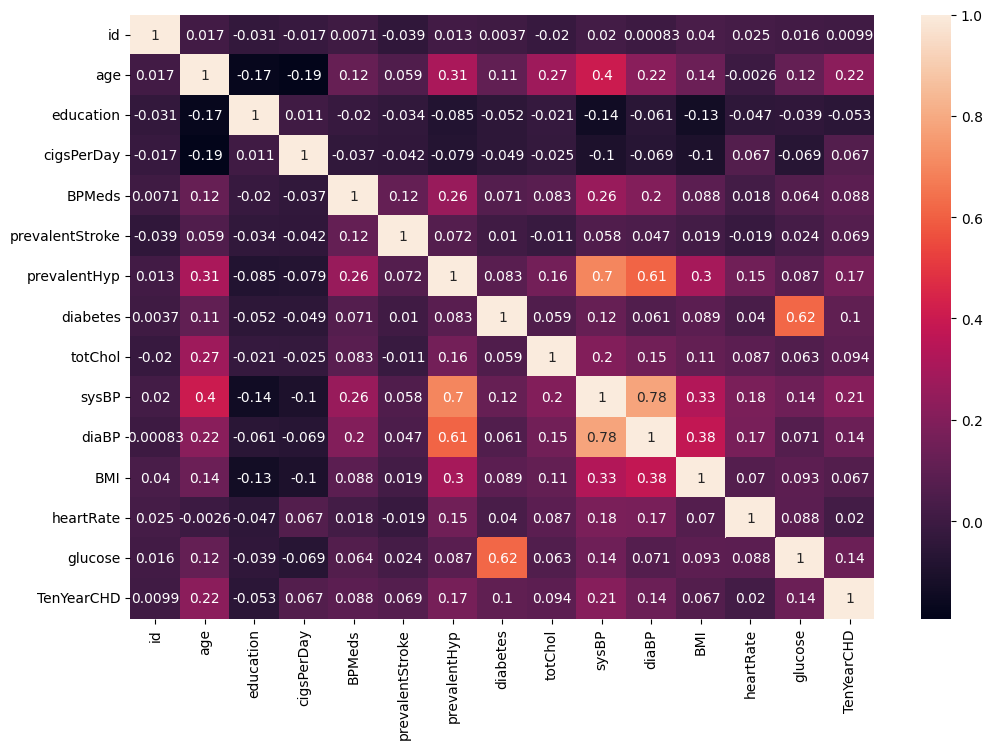

In [ ]:
# Correlation Heatmap visualization code
plt.rcParams.update({'figure.figsize':(12,8),'figure.dpi':100})

sns.heatmap(df.corr(),annot=True)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
from seaborn.axisgrid import pairplot
# Pair Plot visualization code
#pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.- Patient have common risk for devoloping CHD

2.- There is no relation between the features and devoloping CHD

3.-

### Hypothetical Statement - 1:T-test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups.The t-test is typically used when the sample size is small, or when the population standard deviation is unknown. There are several types of t-tests, including the Student's t-test and the Welch's t-test, which are used for different types of data and research questions.

Ho: On average, Patients have the common risk of devoloping heart disease

Ha:  On average, Patients have not the common risk of devoloping heart disease




#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy #importing library

In [ ]:
# Perform Statistical Test to obtain P-Value
def ttest(col1, col2, varname ):
    t, p = scipy.stats.ttest_ind(col1,col2)
    #print('t=%.2f, p=%.30f' % (t, p))
    print("ttest_ind:               t = %g  p = %g" % (t, p))

    if p > 0.05:
       print('fail to reject null hypothesis', varname, 'has no effect on  devoloping CHD')
    else:
       print('reject null hypothesis' , varname, 'has impact on risk of devoloping CHD')



In [ ]:
#Defining data variables 
CHD = df[df.TenYearCHD == 0]
NoCHD = df[df.TenYearCHD == 1]

In [ ]:
ttest(CHD.age,NoCHD.age,"Age")

ttest_ind:               t = -13.4365  p = 3.86915e-40
reject null hypothesis Age has impact on risk of devoloping CHD


In [ ]:
#effect of cigssperday
ttest(CHD.cigsPerDay,NoCHD.cigsPerDay,"cigsPerDay")

ttest_ind:               t = nan  p = nan
reject null hypothesis cigsPerDay has impact on risk of devoloping CHD


In [ ]:
ttest(CHD.diabetes,NoCHD.diabetes,"Diabetes")

ttest_ind:               t = -6.0676  p = 1.44156e-09
reject null hypothesis Diabetes has impact on risk of devoloping CHD


##### Which statistical test have you done to obtain P-Value?

A hypothesis t-test is a statistical test used to determine whether there is enough evidence to support a claim about a population mean. The test is based on a sample from the population, and uses the sample mean and standard deviation to estimate the population mean and standard deviation

##### Why did you choose the specific statistical test?

A t-test is used to determine whether there is enough evidence to support a claim about a population mean. The test is based on a sample from the population, and uses the sample mean and standard deviation to estimate the population mean and standard deviation.

### Hypothetical Statement - 2 : chi squared test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The chi-squared test is a statistical test used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. It is commonly used to determine if there is a significant association between two categorical variables.

Ho = There's no relation between features and devoloping CHD

Ha = both are related to each other 

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Perform Statistical Test to obtain P-Value
def chi2_test(col1, col2, varname):
  contingency_data = pd.crosstab(col1, col2)
  stat, p, dof, expected = chi2_contingency(contingency_data)
  print("Chi-Square Value: " + stat.astype(str))
  print("P Value: " + p.astype(str))
  if p > 0.05:
     print('fail to reject null hypothesis', varname, 'has no effect on  devoloping CHD')
  else:
     print('reject null hypothesis' , varname, 'has impact on risk of devoloping CHD')


In [ ]:
chi2_test(df.education, df.TenYearCHD, "gender")

Chi-Square Value: 22.16105229004903
P Value: 6.038646749234552e-05
reject null hypothesis gender has impact on risk of devoloping CHD


In [ ]:
chi2_test(df.BPMeds, df.TenYearCHD, "BPMeds")

Chi-Square Value: 24.497970055393846
P Value: 7.438816815316195e-07
reject null hypothesis BPMeds has impact on risk of devoloping CHD


In [ ]:
chi2_test(df.is_smoking, df.TenYearCHD, "Smoking")

Chi-Square Value: 3.763250993795598
P Value: 0.05239062274853224
fail to reject null hypothesis Smoking has no effect on  devoloping CHD


##### Which statistical test have you done to obtain P-Value?

The chi-squared test-The test is based on the chi-squared distribution, and the p-value obtained from the test can be used to determine the significance of the difference between the observed and expected frequencies.

##### Why did you choose the specific statistical test?

The chi-squared test is used in hypothesis testing to determine if there is a significant difference between the expected frequencies and the observed frequencies in one or more categorical variables. It is used to test the goodness of fit of a theoretical distribution to a set of data, or to test for independence between two categorical variables in a contingency table.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


Treatment of **education** feature

In [ ]:
#Hence, the education is a categorical column so, we replace the missing value in education column with mode. So, check the mode

df.education.mode()[0]

1.0

In [ ]:
df.education.fillna(df.education.mode()[0],inplace=True)


In [ ]:
df.education.unique()

array([2., 4., 1., 3.])

Treatment of **CigsPerDay** feature

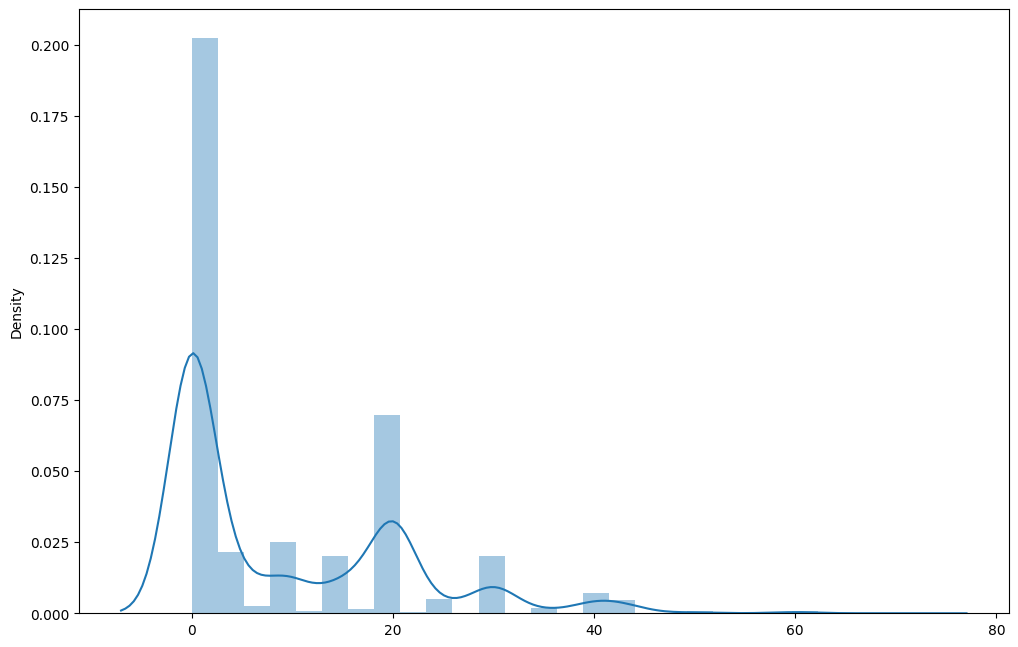

In [ ]:
sns.distplot(x=df.cigsPerDay)

In [ ]:
df.cigsPerDay.mode()[0]

0.0

In [ ]:
df.cigsPerDay.fillna(df.cigsPerDay.mode()[0],inplace=True)

In [ ]:
df['cigsPerDay'].describe()

count    3390.000000
mean        9.010619
std        11.862839
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

Treatment of **BPMeds** column

In [ ]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [ ]:
df.BPMeds.fillna(df.BPMeds.mode()[0], inplace=True)

Treatment of **heartRate** column

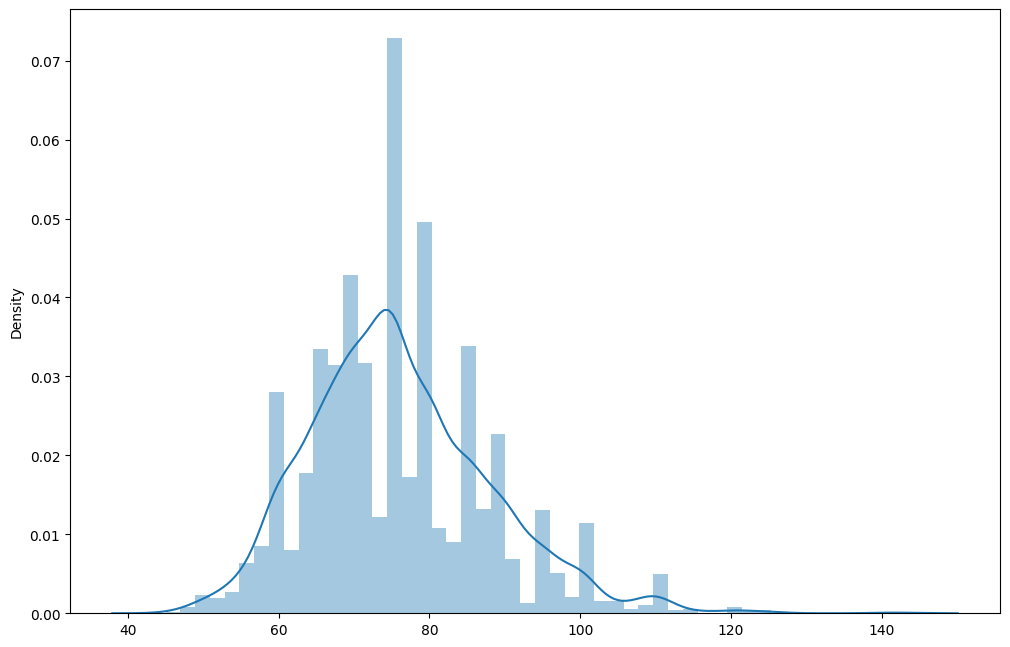

In [ ]:
sns.distplot(x=df.heartRate) # plot the density plot of heartRate to check its distribution

In [ ]:
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [ ]:
df.heartRate.median()

75.0

In [ ]:
df.heartRate.mode()

0    75.0
dtype: float64

In [ ]:
df.heartRate.mean()

75.97727943346119

In [ ]:
df.heartRate.median()

75.0

In [ ]:
# Replace the null value with median (or mode or mean because they are all equal)
df.heartRate.fillna(df.heartRate.median(),inplace=True) 

Treatment of **totChol**

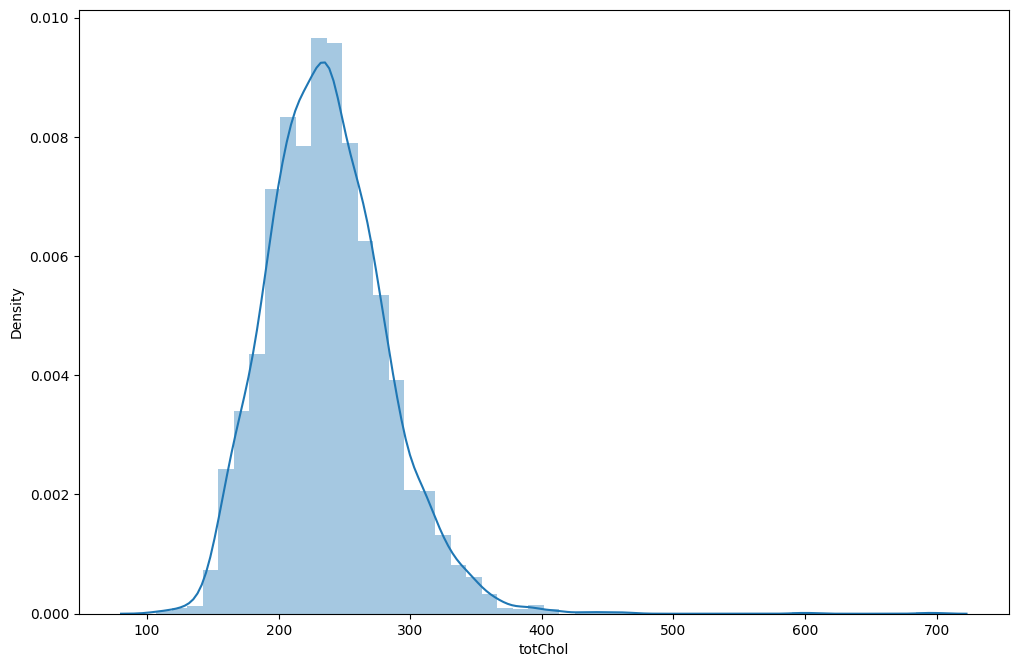

In [ ]:
ax=sns.distplot(df.totChol,kde=True)


In [ ]:
df.totChol.describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [ ]:
df.totChol.mode()

0    240.0
dtype: float64

In [ ]:
df.totChol.median()

234.0

In [ ]:
df.totChol.fillna(df.totChol.median(),inplace=True) #Here the totChol shows a positive skew data so, replace the null value with median

Treatment of **glucose** column

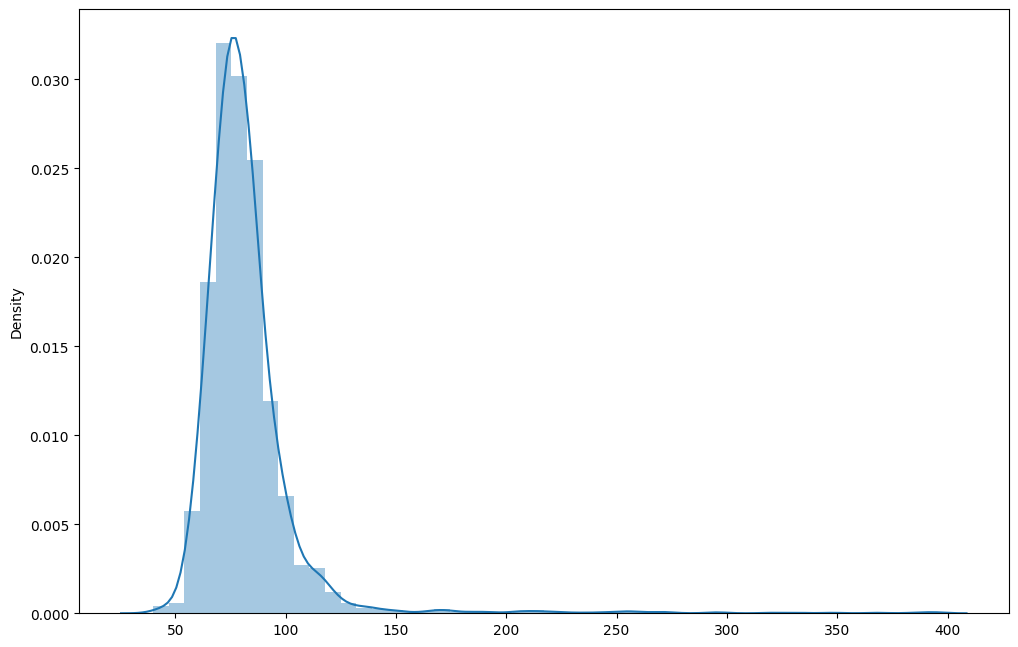

In [ ]:
sns.distplot(x=df.glucose, kde=True)

In [ ]:
df.glucose.describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

The above density plot shows the distribution is slightly positive skewed. So, replace the null value with median.

In [ ]:
df.glucose.fillna(df.glucose.median(), inplace=True)

Treatment of **BMI** column

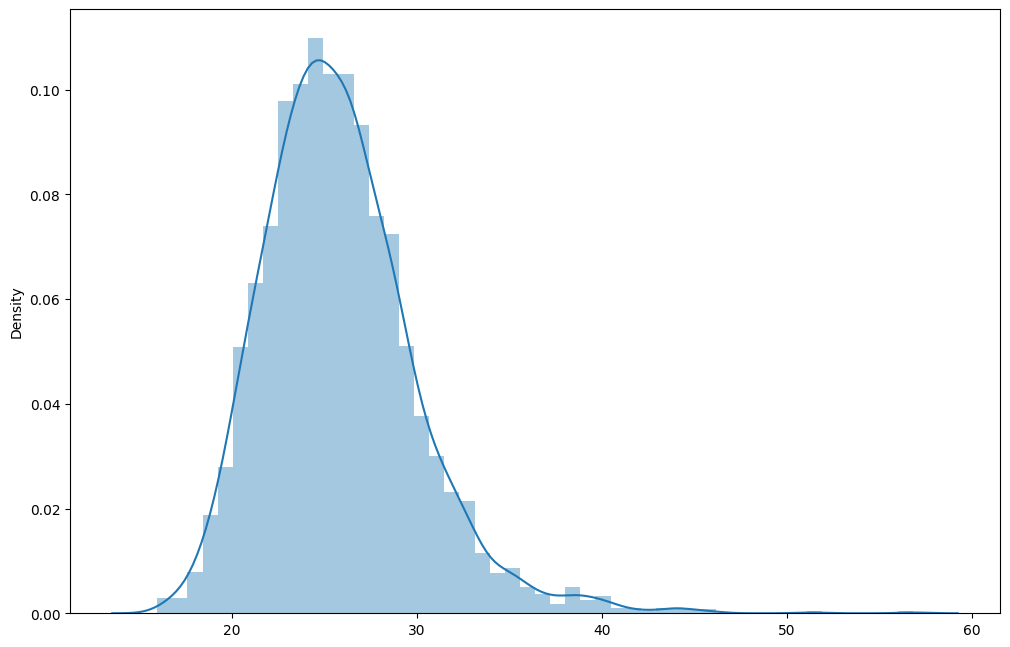

In [ ]:
sns.distplot(x=df.BMI)

In [ ]:
df.BMI.fillna(df.BMI.median(),inplace=True) # Here, BMI feature shows that its distribiution is slightly skewed so, replace null value with median

In [ ]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

In **education** column, the null values are replaced by mode because this column is categorical.

In **cigsPerDay** feature, the missing values are treated using mode because it contains a fixed number of integers.

In **BPMeds**, the null values are treated using the mode (which is 0) because lots of people are not on the blood pressure medication.

The **totChol** column represents a numerical column so, we replaced the null values with median because the distribution is slightly positive skewed.

The column **glucode**, we treat missing value with median because it shows a numerical column.

In **BMI** column, we replace the missing value with median because it is a numerical column.
The **heartRate** column has only one null value, and its mode, median, and mean are approximately equal. So, we can treat with any of these three parameters.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
df.describe().columns.to_list()

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

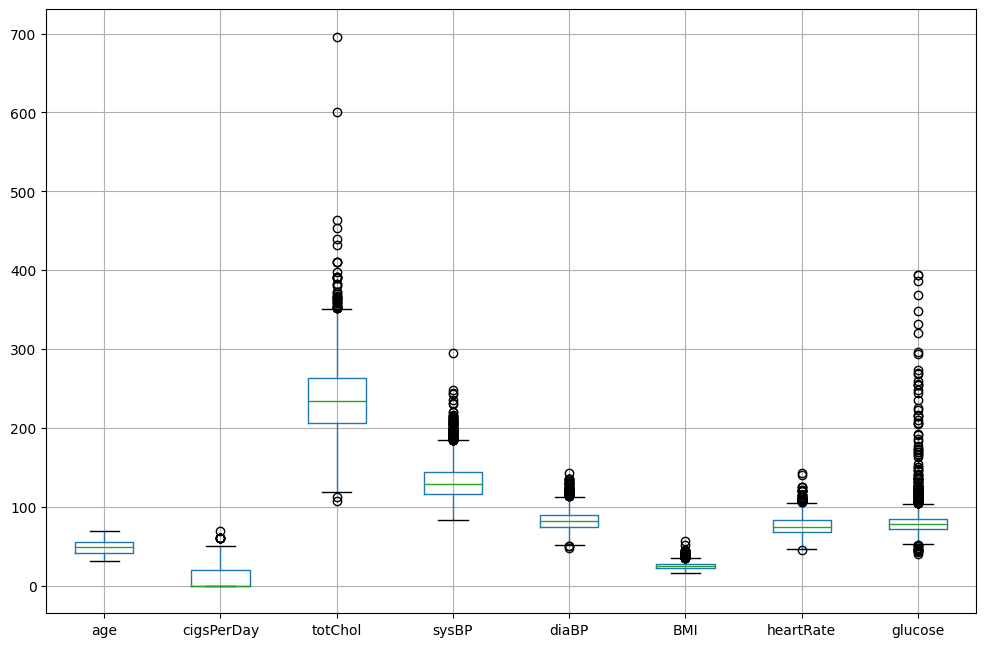

In [ ]:
# for col in df.describe().columns.to_list():
#   plt.subplots(1,1)
#   ax=sns.boxplot(y=df[col])
#   ax.set_title(f'The boxplot of {col}')
box_df=df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
box_df.boxplot()
plt.rcParams.update({'figure.figsize':(12,10),'figure.dpi':100})

In [ ]:
dff = df.copy()
dff

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
'''def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

#final_df=cap_data(df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])'''

'def cap_data(df):\n    for col in df.columns:\n        print("capping the ",col)\n        if (((df[col].dtype)==\'float64\') | ((df[col].dtype)==\'int64\')):\n            percentiles = df[col].quantile([0.05,0.95]).values\n            df[col][df[col] <= percentiles[0]] = percentiles[0]\n            df[col][df[col] >= percentiles[1]] = percentiles[1]\n        else:\n            df[col]=df[col]\n    return df\n\n#final_df=cap_data(df[[ \'age\',\'cigsPerDay\',\'totChol\', \'sysBP\', \'diaBP\', \'BMI\', \'heartRate\', \'glucose\']])'

In [ ]:
#cap_data(df[['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

In [ ]:
def cap_outliers(df, columns, lower_threshold, upper_threshold):
    for col in columns:
        lower_cap = df[col].quantile(lower_threshold)
        upper_cap = df[col].quantile(upper_threshold)
        df[col] = df[col].clip(lower_cap, upper_cap)
    return df

columns_to_cap = ['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
capped_df = cap_outliers(df, columns_to_cap, lower_threshold=0.05, upper_threshold=0.95)


In [ ]:
df.cigsPerDay.describe()

count    3390.000000
mean        8.512389
std        10.585444
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        30.000000
Name: cigsPerDay, dtype: float64

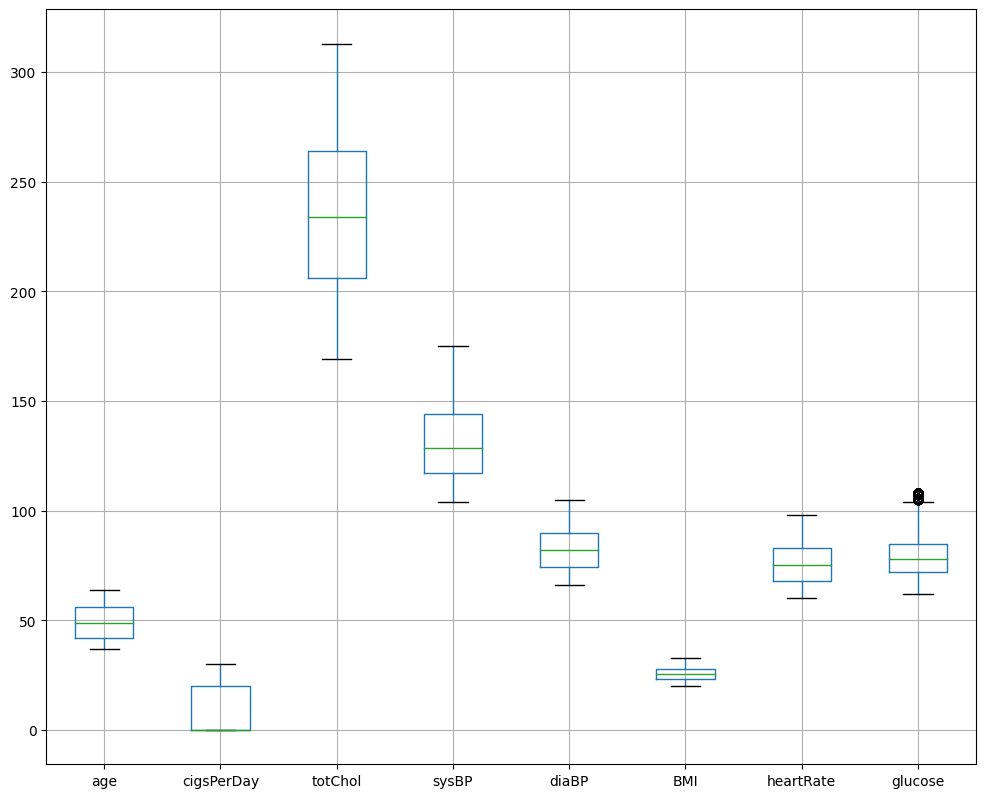

In [ ]:
box_df=df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
box_df.boxplot()
plt.rcParams.update({'figure.figsize':(12,10),'figure.dpi':100})

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
categorical_col=set(list(df.columns))-set(list(df.describe().columns.to_list()))
categorical_col

{'is_smoking', 'sex'}

In [ ]:
df.is_smoking.unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [ ]:
#np.where(condition, x, y)

df["sex"] = np.where(df.sex=='M', 1, 0)
df["is_smoking"] = np.where(df.is_smoking=='YES',1,0)

In [ ]:
df['sex'].describe()

count    3390.000000
mean        0.432743
std         0.495529
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [ ]:
df.drop(['id'],axis=1, inplace=True)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,37.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

There are two categorical columns in dataset i.e 'sex' and 'is_smoking'. I used binary encoding to treat these columns.
If sex="M", it is replaced with 1 else zero. If 'is_smoking'='YES' it is encoded as 1 else 0.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
def read_blood_pressure(df):
    # Create new column to store the hypertension category
    df['hypertension_category'] = None
    # Iterate over each row in the dataframe
    for i, row in df.iterrows():
        # Get the systolic and diastolic values from the dataframe rows
        systolic = row['sysBP']
        diastolic = row['diaBP']
        # Check for hypertension category
        if systolic < 120 and diastolic < 80:
            df.loc[i, 'hypertension_category'] = 'normalBP'
        elif systolic >= 120 and systolic < 129 and diastolic < 80:
            df.loc[i, 'hypertension_category'] = 'elevatedBP'
        elif (systolic >= 130 and systolic < 139) or (diastolic >= 80 and diastolic < 89):
            df.loc[i, 'hypertension_category'] = 'stage1_hypertension'
        elif (systolic >= 140 and systolic < 179) or (diastolic >= 90 and diastolic < 119):
            df.loc[i, 'hypertension_category'] = 'stage2_hypertension'
        else:
            df.loc[i, 'hypertension_category'] = 'critical'
    return df


In [ ]:
read_blood_pressure(df)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,hypertension_category
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,stage1_hypertension
1,37.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,stage2_hypertension
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,normalBP
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,stage1_hypertension
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,stage1_hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60.0,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,elevatedBP
3386,46.0,1.0,0,0,0.0,0.0,0,0,0,199.0,104.0,66.0,21.96,80.0,84.0,0,normalBP
3387,44.0,3.0,1,1,3.0,0.0,0,1,0,313.0,164.0,105.0,28.92,73.0,72.0,1,stage2_hypertension
3388,60.0,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,stage2_hypertension


In [ ]:
# now convert bp variables into number
def encode_bp(df):
    df['hypertension_category'] = df['hypertension_category'].apply(lambda x: 1 if x == 'normalBP' else (2 if x == 'elevatedBP' else (3 if x == 'stage1_hypertension' else (4 if x == 'stage2_hypertension' else (5 if x == 'critical' else x)))))
    return df


In [ ]:
encode_bp(df)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,hypertension_category
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,3
1,37.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,4
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60.0,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,2
3386,46.0,1.0,0,0,0.0,0.0,0,0,0,199.0,104.0,66.0,21.96,80.0,84.0,0,1
3387,44.0,3.0,1,1,3.0,0.0,0,1,0,313.0,164.0,105.0,28.92,73.0,72.0,1,4
3388,60.0,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,4


#### 2. Feature Selection

In [ ]:
df2=df.copy()

In [ ]:
df2.drop(['sysBP', 'diaBP'], axis=1, inplace=True)

since, cigs_per_day column is already having the information about smokers so we dont need is_smoking column 

In [ ]:
df2.drop(["is_smoking"],axis=1,inplace=True)

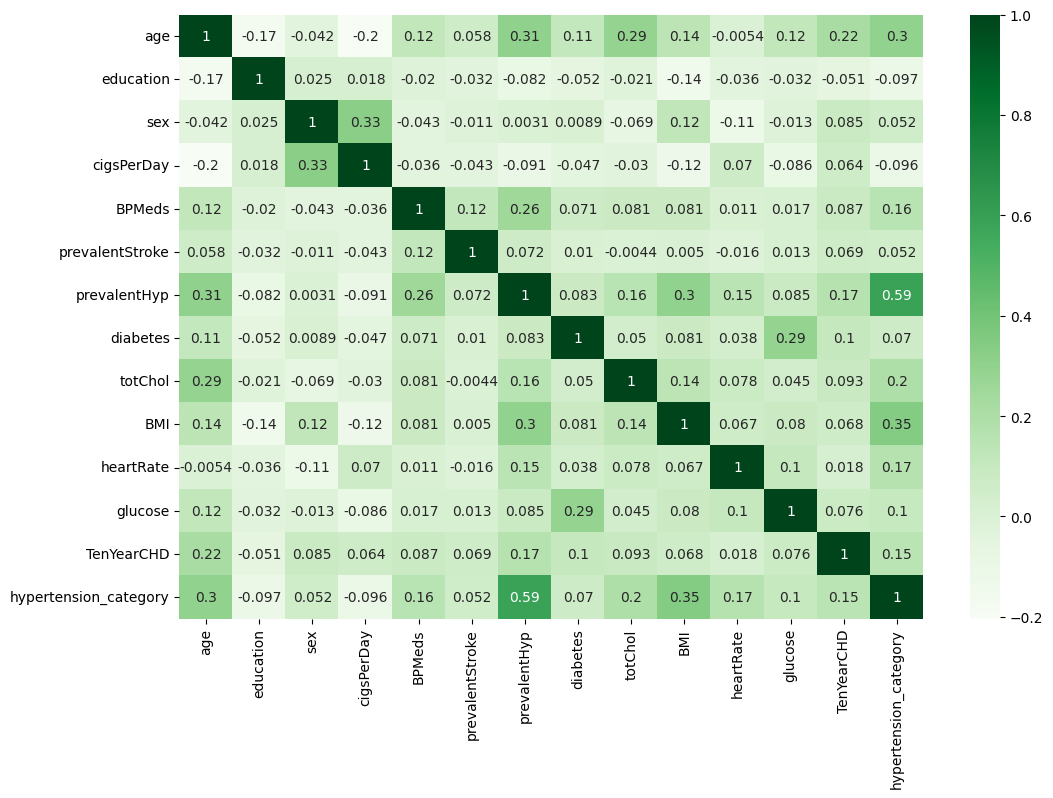

In [ ]:
# Correlation Heatmap visualization code
plt.rcParams.update({'figure.figsize':(12,8),'figure.dpi':100})

sns.heatmap(df2.corr(),cmap= 'Greens',annot=True)

##### What all feature selection methods have you used  and why?

First we checked every variables through Data wrangling and Data visulisation and their relationship between them after that we select feature as per their importance how they affect to Produce CHD.
then we have removed some variables by converting them into one features in the sction of Features manupulation and also we removed some useless variable .

##### Which all features you found important and why?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  # final_df.plot.bar(color='teal')
  return final_df

In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=df2.drop(["TenYearCHD"],axis=1),y=df["TenYearCHD"])

,Features,Importances
5,prevalentStroke,0.005493
7,diabetes,0.009936
4,BPMeds,0.011189
6,prevalentHyp,0.023434
2,sex,0.024782
12,hypertension_category,0.048000
1,education,0.050363
3,cigsPerDay,0.070193
10,heartRate,0.129252
11,glucose,0.141308


Finally we found out 13 indepenedent features which are affecting to devolope CHD and valdate their importances through Embedded method using random forest classifier feature importance and we can see on above graph all the features have some importance none of them are zero.

### 5. Data Transformation

In [ ]:
for column in df2.columns:
    print(column)
    print(df2[column].skew())
    

age
0.19933505114565864
education
0.7352403272651097
sex
0.2716141401804689
cigsPerDay
0.7987202700140527
BPMeds
5.563972386285764
prevalentStroke
12.297612002671828
prevalentHyp
0.7951885864720627
diabetes
6.001977441386289
totChol
0.2009466755219177
BMI
0.33496376508337866
heartRate
0.3967279461624882
glucose
0.7287503478673296
TenYearCHD
1.953181703698407
hypertension_category
-0.3807787326318706


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

NO, from above skewness result we can see that our data is following gaussian distribution  

so we dont need to transform the data.

### 6. Data Scaling

In [ ]:
df3=df2.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling your data
#applying standardScaler 
scaler = StandardScaler()
columns = ['age', 'cigsPerDay', 'totChol', 'heartRate','hypertension_category', 'BMI', 'heartRate', 'glucose' ]
df3[columns] = scaler.fit_transform(df3[columns])

##### Which method have you used to scale you data and why?

StandardScaler is used to resize the distribution

StandardScaler is a pre-processing technique in machine learning and statistics used to standardize a dataset, meaning it scales the data so that it has a mean of 0 and a standard deviation of 1. This is useful because many machine learning algorithms require that the input data is in a standard scale in order to work properly.

In [ ]:
df3.head(1) #checking scalled data

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,hypertension_category
0,1.738547,2.0,0,-0.520829,0.0,0,0,0,-0.380748,-0.082252,1.328161,0.012189,1,0.277079


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x, y = df3.loc[:, df3.columns != 'TenYearCHD'], df3['TenYearCHD']

In [ ]:
#importing library to split
from sklearn.model_selection import train_test_split
#dividing the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0, stratify=y)
print(x_train.shape)
print(x_test.shape)

(2712, 13)
(678, 13)


##### What data splitting ratio have you used and why? 

Here we are taking the data splitting ratio is 80:20, this means that 80% of the data is used for training and 20% of the data is used for testing. This is a commonly used ratio in machine learning as it allows for a sufficient amount of data to be used for training the model, while also reserving a meaningful portion of the data for testing the model's performance on unseen data. This helps ensure that the model is able to generalize well to new, unseen data and has not overfitted to the training data.

### 9. Handling Imbalanced Dataset

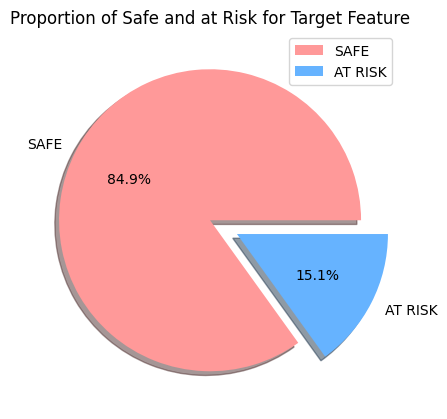

In [ ]:
#lets check data is imbalanced or not
#trying to plot pie chart to show 
plt.figure(figsize=(7,5), dpi=100)
proportion = df['TenYearCHD'].value_counts()
labels = ['SAFE','AT RISK']
plt.title('Proportion of Safe and at Risk for Target Feature')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#ff9999','#66b3ff'])
plt.legend()
plt.show()

In [ ]:

# assume your dataframe is 'df'
# # assume the column name is 'class_column'

# # Create a list of the count of examples in each class
# class_counts = df['TenYearCHD'].value_counts()

# # Create a list of the names of each class
# class_names = class_counts.index

# # Create the pie chart
# plt.pie(class_counts, labels=class_names, autopct='%1.1f%%')

# # Add a title
# plt.title("Class Distribution")

# # Display the chart
# plt.show()


##### Do you think the dataset is imbalanced? Explain Why.

Yes as we can see our data is highly imbalanced

Majority of data points belongs to safe (no risk of devoloping CHD "0") class.

In [ ]:
# Handling Imbalanced Dataset (If needed)
#importing library for handling imbalanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42) #creating instance

In [ ]:
x_train_imbal, y_train_imbal = smote.fit_resample(x,y) #fitting predictor and target

In [ ]:
#now lets check length of our dataset
#after and before
print("balanced data shape (resampled)" , len(x_train_imbal))
print("Original data shape" , len(x_train))

balanced data shape (resampled) 5758
Original data shape 2712


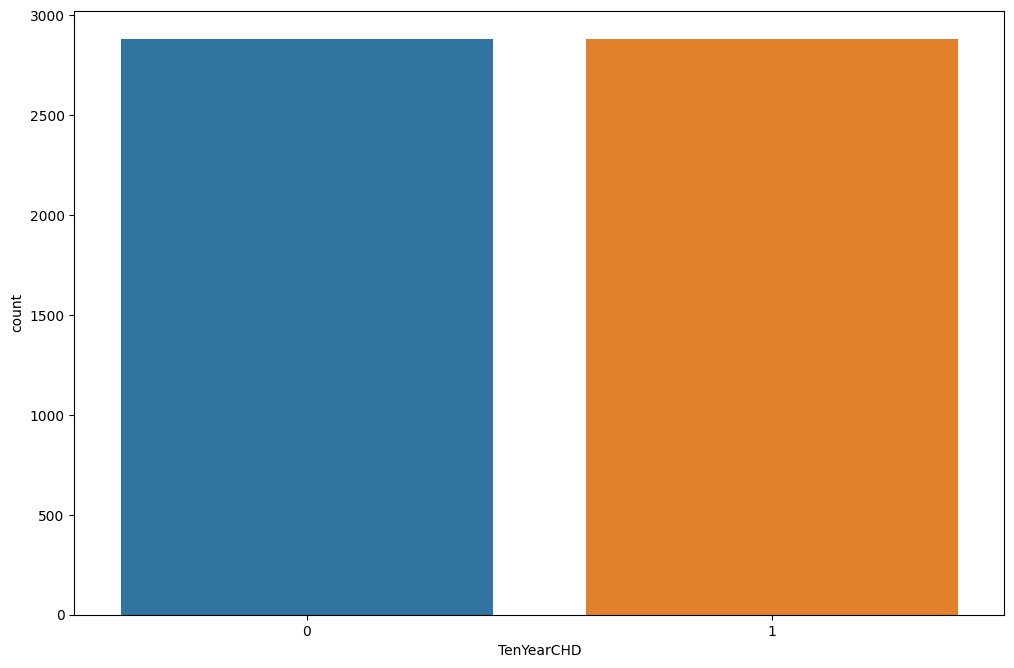

In [ ]:
sns.countplot(y_train_imbal) #checking through plot

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) is a popular method for oversampling in machine learning. It is used to balance the class distribution by generating synthetic samples for the minority class. The synthetic samples are created by interpolating between existing minority class samples. The interpolation is done by selecting two or more nearest minority class samples and taking the linear combination of their feature values. This allows for the creation of new samples that are similar to the existing minority class samples, thereby increasing the overall number of minority class samples and balancing the class distribution.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn import svm

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model


#create classifier 

svcm = svm.SVC(kernal='poly')
# Fit the Algorithm
svcm.fit

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***